In [ ]:
pip install mysql-connector-python


     |████████████████████████████████| 25.2 MB 1.9 MB/s 


In [ ]:
pip install --upgrade scipy


     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import text

class JskDB:
    """
    Example of SQL connection class
    """
    
    def __init__(self):
        # MySQL database credentials 
        self.host = 'jellybas.cxvglcwgczps.us-west-2.rds.amazonaws.com'
        self.port = 3306
        self.user = 'da_ro' 
        self.password = 'UXDcu5ULheGEYJWF78Zy'
        self.db = 'da2'

    def create_connection(self):
        """Initialize MySQL connection"""
        engine = create_engine(f"mysql+mysqlconnector://{self.user}:{self.password}@{self.host}:{self.port}/{self.db}?charset=utf8",echo=False).connect()

        try:
            print(engine)
            return engine
        except Exception as e:
            print(e)


# How to use 
def get_data(query):

    """
    open a MySQL connection, run your code and close the connection
    """

    # open connection
    sql_connection = JskDB().create_connection()

    query_res = sql_connection.execute(text(query))
    df = pd.DataFrame(query_res.fetchall())
    df.columns = query_res.keys()

    # close connection
    sql_connection.close() 

    return df

# get data

In [ ]:
channels = get_data('SELECT * FROM snap_channels')
behavior = get_data('SELECT snap_channels.channel_name, snap_behavior.* FROM snap_behavior INNER JOIN snap_channels ON snap_channels.channel_fbid=snap_behavior.channel_fbid')
stories = get_data('SELECT snap_channels.channel_name, snap_stories.* FROM snap_stories INNER JOIN snap_channels ON snap_channels.channel_fbid=snap_stories.channel_fbid')
audience = get_data('SELECT * FROM snap_audience')


# EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Channels

In [ ]:
channels.head()

channel_fbid           channel_name
0  5099640474828800         Riddle Me This
1  5109890280062976             Beauty Wow
2  5132076604719104           Beauty Hacks
3  5171177986981888  Accuse moi si tu peux

In [ ]:
channels.shape

(4, 2)

### Behavior

In [ ]:
behavior.head()

channel_name      channel_fbid    datestat  topsnaps_unique_per_user  \
0  Riddle Me This  5099640474828800  2018-06-27                    9.1119   
1  Riddle Me This  5099640474828800  2018-06-28                    8.5957   
2  Riddle Me This  5099640474828800  2018-06-29                    8.2505   
3  Riddle Me This  5099640474828800  2018-06-30                    8.0658   
4  Riddle Me This  5099640474828800  2018-07-01                    8.5039   

   total_time_viewed_sec  time_spent  topsnap_views_perc  topsnap_views  \
0              128663480   81.016220                 1.0       22394967   
1               50349224   75.312096                 1.0        8745435   
2               33378296   72.913081                 1.0        5816191   
3               19884430   68.273893                 1.0        3522050   
4               25484484   74.496649                 1.0        4446777   

   topsnap_views_unique  screenshots  shares  
0              14470763         4193    4400  
1               5746557         1443    1550  
2               3776914         1184     845  
3               2349130          779     485  
4               2909078          800     518

In [ ]:
behavior.shape

(369, 11)

In [ ]:
pd.unique(behavior['channel_name']) #which channels are in the df

array(['Riddle Me This', 'Beauty Wow', 'Beauty Hacks',
       'Accuse moi si tu peux'], dtype=object)

In [ ]:
print('analysis period form {} to {}'.format(np.min(behavior['datestat']), np.max(behavior['datestat']))) #analysis period
print('number of analysis days: {}'.format((np.max(behavior['datestat'])- np.min(behavior['datestat'])).days)) #analysis period


analysis period form 2018-06-27 to 2018-11-11
number of analysis days: 137


In [ ]:
behavior_agg_date = behavior.groupby('channel_name').datestat.agg(['min', 'max', 'count'])
behavior_agg_date['days_obs'] = (behavior_agg_date['max'] - behavior_agg_date['min']).dt.days
print('number of analysis days per channel:')
print(behavior_agg_date)

number of analysis days per channel:
                              min         max  count  days_obs
channel_name                                                  
Accuse moi si tu peux  2018-08-24  2018-11-11     80        79
Beauty Hacks           2018-08-28  2018-11-11     76        75
Beauty Wow             2018-08-28  2018-11-11     75        75
Riddle Me This         2018-06-27  2018-11-11    138       137


In [ ]:
ser_wow_date = np.array(behavior[behavior['channel_name']=='Beauty Wow'].datestat)
base = datetime.date(2018,8,28)
date_list = [base + datetime.timedelta(days=x) for x in range(ser_wow_date.shape[0])]
theo_dates = np.array(date_list)

In [ ]:
print('In Beauty Wow the data from {} are missing'.format(theo_dates[ser_wow_date!=theo_dates][0]))

In Beauty Wow the data from 2018-08-30 are missing


In [ ]:
behavior.describe()

channel_fbid  topsnaps_unique_per_user  total_time_viewed_sec  \
count  3.690000e+02                369.000000           3.690000e+02   
mean   5.123914e+15                  9.465920           4.334796e+07   
std    2.757571e+13                  3.962931           5.635124e+07   
min    5.099640e+15                  0.000000           0.000000e+00   
25%    5.099640e+15                  7.199300           1.229629e+07   
50%    5.109890e+15                  9.042500           2.184408e+07   
75%    5.132077e+15                 11.491200           4.414062e+07   
max    5.171178e+15                 25.419500           3.665454e+08   

       time_spent  topsnap_views_perc  topsnap_views  topsnap_views_unique  \
count  369.000000          369.000000   3.690000e+02          3.690000e+02   
mean    79.535624            0.986450   7.201411e+06          6.167099e+06   
std     41.442226            0.115771   1.195142e+07          1.105681e+07   
min      0.000000            0.000000   0.000000e+00          0.000000e+00   
25%     47.993810            1.000000   1.732628e+06          1.393216e+06   
50%     65.476978            1.000000   3.009400e+06          2.354486e+06   
75%    111.706157            1.000000   7.562233e+06          6.050901e+06   
max    186.510438            1.000000   1.049078e+08          1.001322e+08   

        screenshots        shares  
count    369.000000    369.000000  
mean    1821.769648   1689.430894  
std     4810.834101   3333.131578  
min        0.000000      0.000000  
25%      222.000000    248.000000  
50%      462.000000    496.000000  
75%     1260.000000   1518.000000  
max    52314.000000  29843.000000

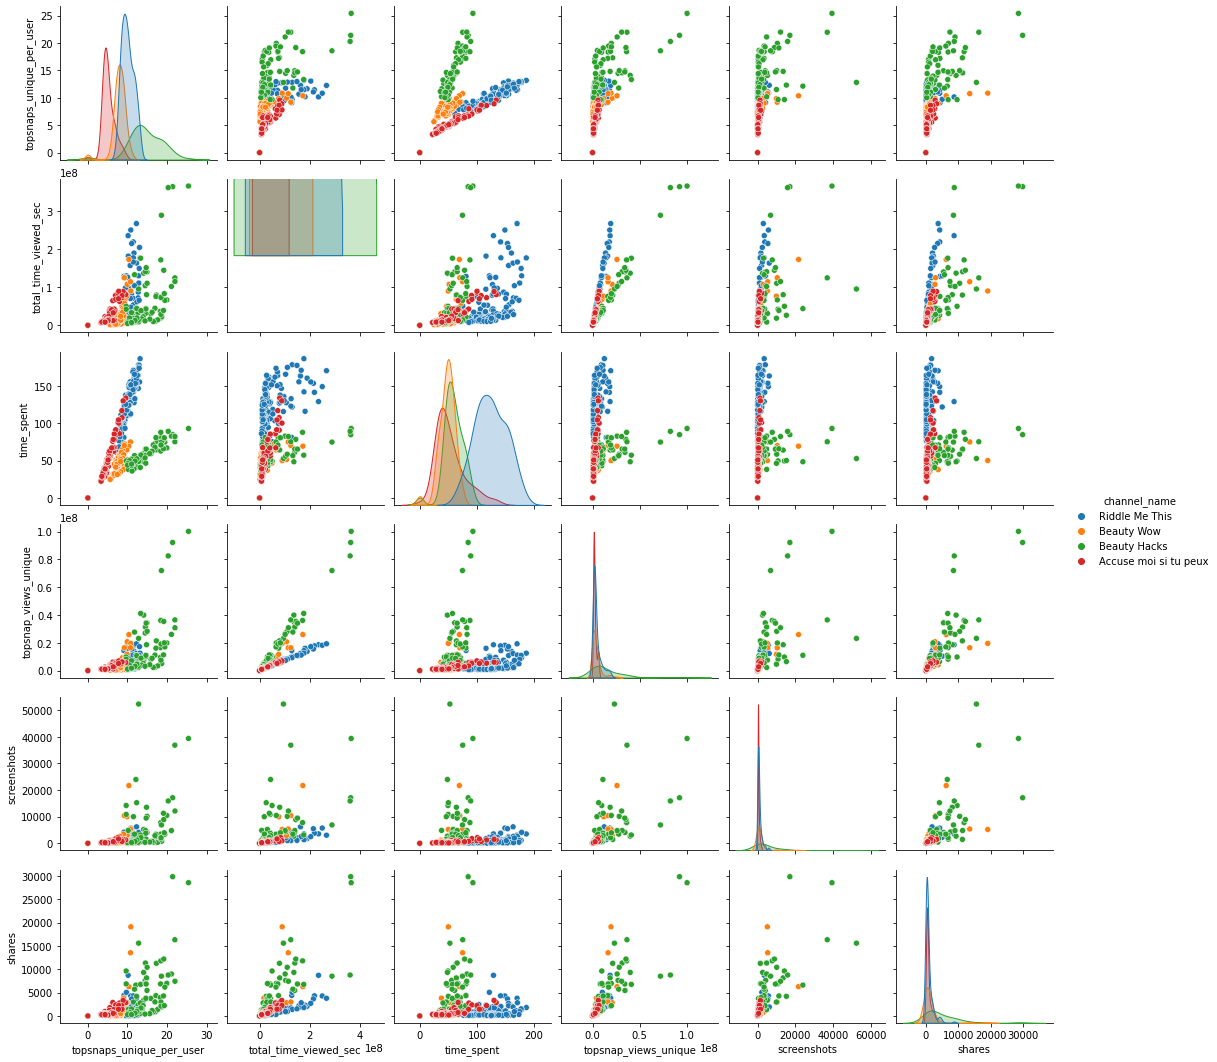

In [ ]:
pairplot = sns.pairplot(behavior.drop(['channel_fbid','datestat','topsnap_views_perc','week','topsnap_views', 'total_time_viewed_sec_7d_avg'],axis=1),hue='channel_name')
fig = pairplot.fig
fig.savefig("out.png") 

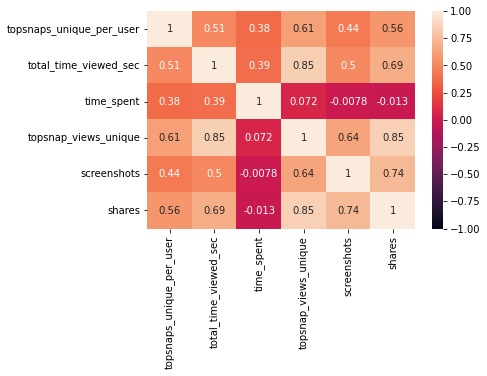

In [ ]:
sns.heatmap(behavior.drop(['channel_fbid','datestat','topsnap_views_perc','week','topsnap_views', 'total_time_viewed_sec_7d_avg'],axis=1).corr(),vmin=-1, vmax=1, annot=True)

### Visualize

In [ ]:
behavior['week'] = pd.to_datetime(behavior['datestat']).dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


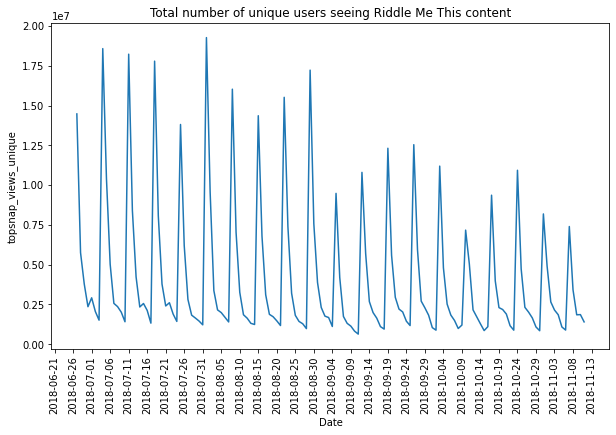

In [ ]:
plt.figure(figsize=(10,6))
graph = sns.lineplot(data = behavior[(behavior['channel_name']=='Riddle Me This')], x = 'datestat', y = 'topsnap_views_unique')
locator = mdates.DayLocator(interval = 5)
graph.xaxis.set_major_locator(locator)
graph.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
graph.xaxis.set_label_text('Date')
plt.title('Total number of unique users seeing Riddle Me This content')
plt.xticks(rotation = 90)

plt.show()


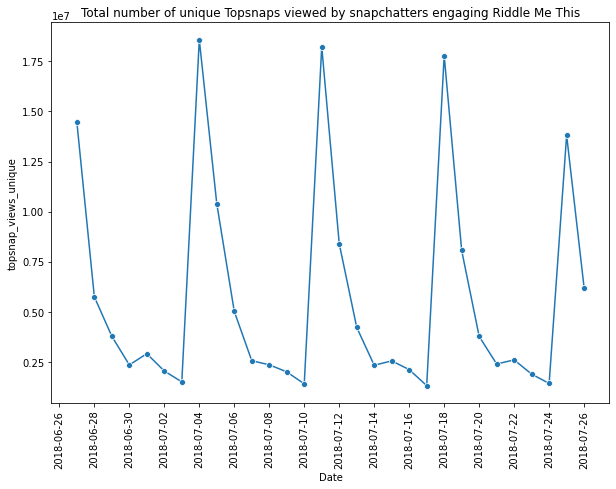

In [ ]:
plt.figure(figsize=(10,7)) #quale giorno della settimana si pubblicano storie? Mercoledi'
graph = sns.lineplot(data = behavior[(behavior['channel_name']=='Riddle Me This') & (behavior['datestat']<=datetime.date(2018,7,26))], x = 'datestat', y = 'topsnap_views_unique', marker='o')
locator = mdates.DayLocator(interval = 2)
graph.xaxis.set_major_locator(locator)
graph.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
graph.xaxis.set_label_text('Date')
plt.title('Total number of unique Topsnaps viewed by snapchatters engaging Riddle Me This')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
behavior['topsnap_views_unique_7d_avg'] = behavior.topsnap_views_unique.rolling(7).mean().shift(-3)

In [ ]:
import matplotlib.dates as mdates


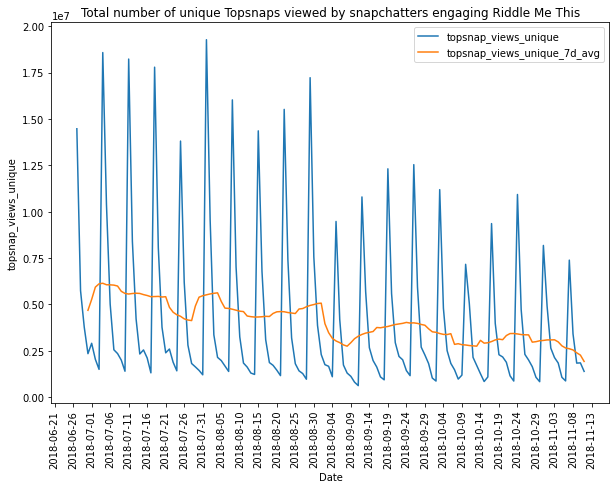

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x="datestat",y="topsnap_views_unique"
             ,  data=behavior[behavior['channel_name']=='Riddle Me This'], label =  'topsnap_views_unique'
             )

graph = sns.lineplot(x="datestat",y="topsnap_views_unique_7d_avg"
              , data=behavior[behavior['channel_name']=='Riddle Me This'], label='topsnap_views_unique_7d_avg',
             )
locator = mdates.DayLocator(interval = 5)
graph.xaxis.set_major_locator(locator)
graph.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
graph.xaxis.set_label_text('Date')
plt.title('Total number of unique Topsnaps viewed by snapchatters engaging Riddle Me This')
plt.xticks(rotation = 90)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


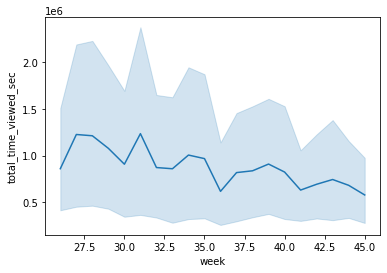

In [ ]:
sns.lineplot(behavior[behavior['channel_name']=='Riddle Me This'].week, behavior[behavior['channel_name']=='Riddle Me This'].total_time_viewed_sec/60.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Avg time spent on Riddle Me This my Snapchatter')

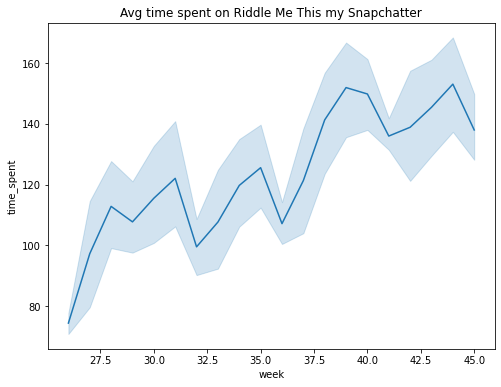

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(behavior[behavior['channel_name']=='Riddle Me This'].week, behavior[behavior['channel_name']=='Riddle Me This'].time_spent)
plt.title('Avg time spent on Riddle Me This my Snapchatter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


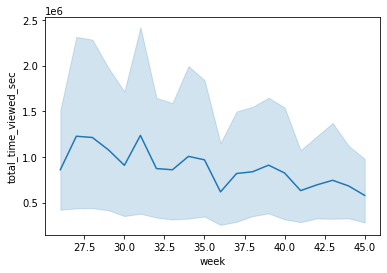

In [ ]:
sns.lineplot(behavior[behavior['channel_name']=='Riddle Me This'].week, behavior[behavior['channel_name']=='Riddle Me This'].total_time_viewed_sec/60.)

In [ ]:
behavior_riddle_accuse = behavior[behavior['channel_name'].isin(['Riddle Me This', 'Accuse moi si tu peux'])]

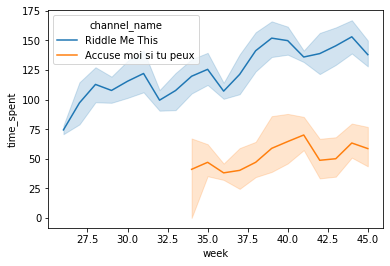

In [ ]:
sns.lineplot(data = behavior_riddle_accuse, x ='week', y='time_spent', hue='channel_name')

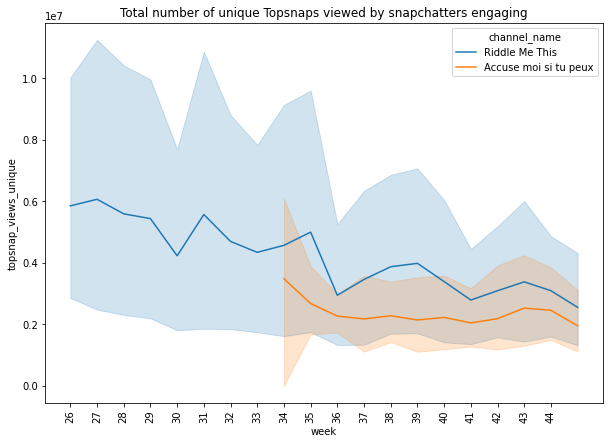

In [ ]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = behavior_riddle_accuse, x ='week', y='topsnap_views_unique', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Total number of unique Topsnaps viewed by snapchatters engaging')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
range(min(behavior_riddle_accuse['week']), max(behavior_riddle_accuse['week']))

range(26, 45)

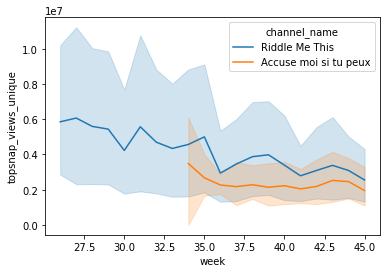

In [ ]:
sns.lineplot(data = behavior_riddle_accuse, x ='week', y='topsnap_views_unique', hue='channel_name')

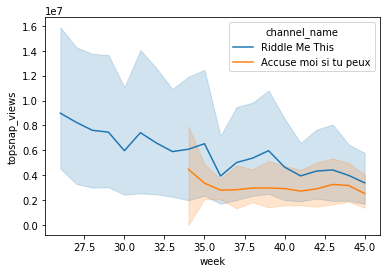

In [ ]:
sns.lineplot(data = behavior_riddle_accuse, x ='week', y='topsnap_views', hue='channel_name')

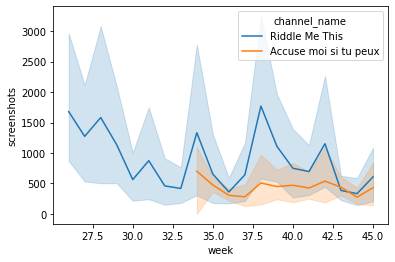

In [ ]:
sns.lineplot(data = behavior_riddle_accuse, x ='week', y='screenshots', hue='channel_name')

### Time Series Tests

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


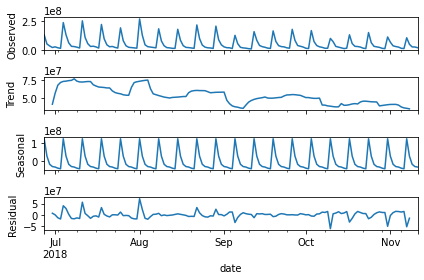

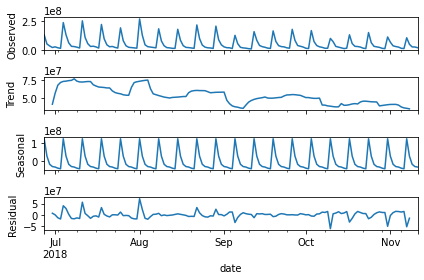

In [ ]:
%matplotlib inline
#  Adfuller for stability
import statsmodels
from statsmodels.tsa.stattools import adfuller

time_series_train = behavior[behavior['channel_name'].isin(['Riddle Me This'])]
time_series_train["date"] = pd.to_datetime(time_series_train["datestat"])
time_series_train.date.freq ="D"
time_series_train.set_index("date", inplace=True)
time_series_train.columns


from statsmodels.tsa.seasonal import seasonal_decompose
sd_1 = seasonal_decompose(time_series_train["total_time_viewed_sec"])
sd_1.plot()

In [ ]:
# test ad-fuller on all time series
import statsmodels
from statsmodels.tsa.stattools import adfuller
temp_var = behavior[behavior['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','datestat','topsnap_views_perc','week'],axis=1).columns
time_series = behavior[behavior['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','datestat','topsnap_views_perc','week'],axis=1)

stable=[]
unite_root = []
print('significance level : 0.05')
for var in temp_var:
    print(f'For {var}')
    tmptime_series = time_series[var].dropna()
    ad_full = adfuller(tmptime_series)
    print(f'Test static {ad_full[1]}',end='\n \n')
    if ad_full[1]<0.05:
        stable.append(var)
    else:
        unite_root.append(var)


significance level : 0.05
For topsnaps_unique_per_user
Test static 0.18150978223525227
 
For total_time_viewed_sec
Test static 0.43023265948840106
 
For time_spent
Test static 0.5004815811878951
 
For topsnap_views
Test static 0.7970064068489426
 
For topsnap_views_unique
Test static 0.5961987356408698
 
For screenshots
Test static 0.062154964617388966
 
For shares
Test static 0.0095038887189208
 
For total_time_viewed_sec_7d_avg
Test static 0.8967396067051077
 
For topsnap_views_unique_7d_avg
Test static 0.859255701935595
 


In [ ]:
one_diff_ts = time_series[unite_root].diff(7)

temp_var = one_diff_ts.columns
time_series = one_diff_ts

stable2=[]
unite_root2 = []
print('significance level : 0.05')
for var in temp_var:
    print(f'For {var}')
    tmptime_series = time_series[var].dropna()
    ad_full = adfuller(tmptime_series)
    print(f'Test static {ad_full[1]}',end='\n \n')
    if ad_full[1]<0.05:
        stable2.append(var)
    else:
        unite_root2.append(var)


significance level : 0.05
For topsnaps_unique_per_user
Test static 0.00015223088307192087
 
For total_time_viewed_sec
Test static 9.165650470252032e-08
 
For time_spent
Test static 2.2837229774066878e-05
 
For topsnap_views
Test static 1.190171713368714e-05
 
For topsnap_views_unique
Test static 4.765783040166988e-06
 
For screenshots
Test static 3.6323233383372656e-08
 
For total_time_viewed_sec_7d_avg
Test static 4.465005211640886e-05
 
For topsnap_views_unique_7d_avg
Test static 1.8377967983767445e-05
 


In [ ]:
stable_riddle_behavior = one_diff_ts
for var in stable:
    stable_riddle_behavior[var] = behavior[behavior['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','datestat','topsnap_views_perc','week'],axis=1)[var]

stable_riddle_behavior['datestat'] = behavior[behavior['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','topsnap_views_perc','week'],axis=1)['datestat']

In [ ]:
stable_riddle_behavior

topsnaps_unique_per_user  total_time_viewed_sec  time_spent  \
0                         NaN                    NaN         NaN   
1                         NaN                    NaN         NaN   
2                         NaN                    NaN         NaN   
3                         NaN                    NaN         NaN   
4                         NaN                    NaN         NaN   
..                        ...                    ...         ...   
133                   -1.1087             -7069320.0   -9.198407   
134                   -2.0947            -18128880.0  -22.199835   
135                   -2.2569             -9424496.0  -23.468177   
136                   -1.8663             -4008164.0  -25.825241   
137                   -2.4226             -5331480.0  -27.917299   

     topsnap_views  topsnap_views_unique  screenshots  \
0              NaN                   NaN          NaN   
1              NaN                   NaN          NaN   
2              NaN                   NaN          NaN   
3              NaN                   NaN          NaN   
4              NaN                   NaN          NaN   
..             ...                   ...          ...   
133      -742480.0             -791586.0        971.0   
134     -1733114.0            -1490273.0        584.0   
135      -899297.0             -807175.0         33.0   
136      -333482.0             -287783.0        218.0   
137      -484788.0             -451818.0        121.0   

     total_time_viewed_sec_7d_avg  topsnap_views_unique_7d_avg  shares  \
0                             NaN                          NaN    4400   
1                             NaN                          NaN    1550   
2                             NaN                          NaN     845   
3                             NaN                          NaN     485   
4                             NaN                          NaN     518   
..                            ...                          ...     ...   
133                 -5.058412e+06                -4.482071e+05     926   
134                 -6.198624e+06                -5.410757e+05     351   
135                 -8.030894e+06                -6.944720e+05     154   
136                 -9.632792e+06                -8.263229e+05     189   
137                 -1.993694e+07                -1.053511e+06     101   

       datestat  
0    2018-06-27  
1    2018-06-28  
2    2018-06-29  
3    2018-06-30  
4    2018-07-01  
..          ...  
133  2018-11-07  
134  2018-11-08  
135  2018-11-09  
136  2018-11-10  
137  2018-11-11  

[138 rows x 10 columns]

In [ ]:
behavior_riddle_before = stable_riddle_behavior[(stable_riddle_behavior['datestat']<datetime.date(2018,8,24))]
behavior_riddle_after = stable_riddle_behavior[(stable_riddle_behavior['datestat']>=datetime.date(2018,8,24))]


In [ ]:
behavior_riddle_before=behavior_riddle_before.dropna()
behavior_riddle_after=behavior_riddle_after.dropna()

Text(0.5, 0, 'date')

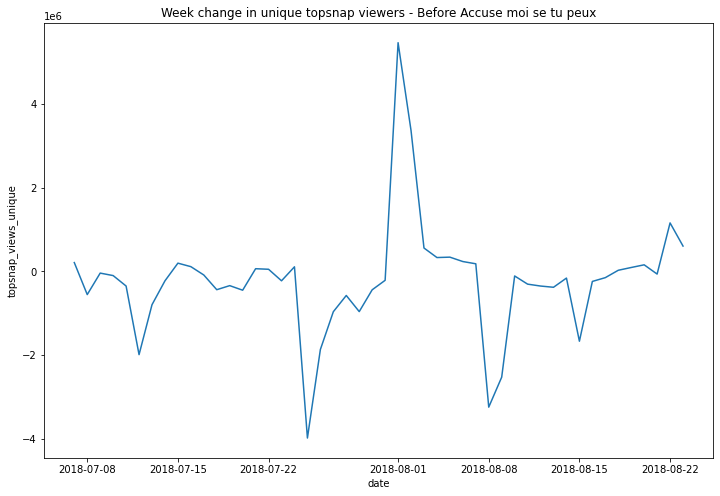

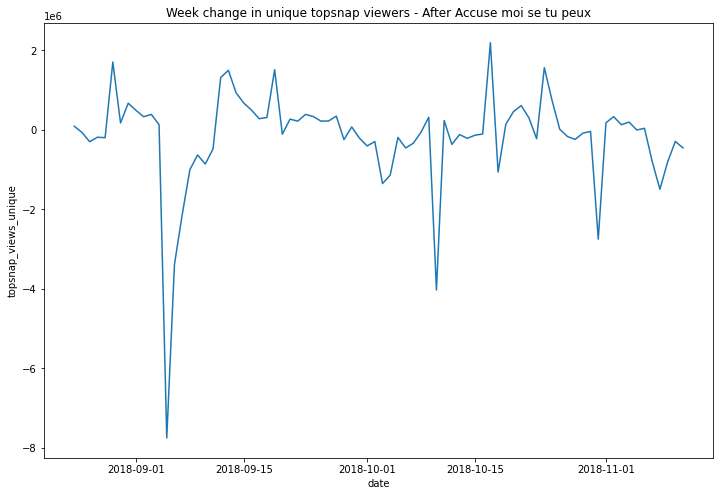

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="topsnap_views_unique", data=behavior_riddle_before)
plt.title('Week change in unique topsnap viewers - Before Accuse moi se tu peux')
plt.xlabel('date')
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="topsnap_views_unique", data=behavior_riddle_after)
plt.title('Week change in unique topsnap viewers - After Accuse moi se tu peux')
plt.xlabel('date')


In [ ]:
for x in stable_riddle_behavior.columns.drop('datestat'):
    q75,q25 = np.percentile(behavior_riddle_before.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    behavior_riddle_before.loc[behavior_riddle_before[x] < min,x] = np.nan
    behavior_riddle_before.loc[behavior_riddle_before[x] > max,x] = np.nan

    q75,q25 = np.percentile(behavior_riddle_after.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    behavior_riddle_after.loc[behavior_riddle_after[x] < min,x] = np.nan
    behavior_riddle_after.loc[behavior_riddle_after[x] > max,x] = np.nan

In [ ]:
behavior_riddle_before.isnull().sum()

topsnaps_unique_per_user         1
total_time_viewed_sec            7
time_spent                       1
topsnap_views                    8
topsnap_views_unique             9
screenshots                     10
total_time_viewed_sec_7d_avg     1
topsnap_views_unique_7d_avg      0
shares                           5
datestat                         0
dtype: int64

In [ ]:
behavior_riddle_after.isnull().sum()

topsnaps_unique_per_user         3
total_time_viewed_sec           12
time_spent                       1
topsnap_views                   11
topsnap_views_unique            13
screenshots                     12
total_time_viewed_sec_7d_avg     5
topsnap_views_unique_7d_avg      4
shares                          12
datestat                         0
dtype: int64

In [ ]:
# diff_before=diff_before.dropna()
# diff_after=diff_after.dropna()

In [ ]:
summary_before = behavior_riddle_before[behavior_riddle_before['datestat']>datetime.date(2018,8,24)-datetime.timedelta(40)].describe()
summary_before

topsnaps_unique_per_user  total_time_viewed_sec  time_spent  \
count                 38.000000           3.200000e+01   38.000000   
mean                   0.158758          -1.839930e+06    1.821213   
std                    0.763622           6.591731e+06   18.057142   
min                   -1.374400          -1.612918e+07  -35.683620   
25%                   -0.278875          -7.452534e+06   -7.182416   
50%                    0.161800          -1.612982e+06    7.172499   
75%                    0.680500           2.486919e+06   13.796601   
max                    1.490200           1.534462e+07   28.805251   

       topsnap_views  topsnap_views_unique  screenshots  \
count   3.200000e+01             31.000000    30.000000   
mean   -1.230045e+05        -116305.935484   -95.100000   
std     4.965176e+05         370257.268734   194.127464   
min    -1.226423e+06        -964411.000000  -523.000000   
25%    -4.050138e+05        -345946.000000  -233.000000   
50%    -7.515100e+04        -110026.000000  -120.000000   
75%     1.618992e+05         110594.500000    73.000000   
max     1.281222e+06         604266.000000   261.000000   

       total_time_viewed_sec_7d_avg  topsnap_views_unique_7d_avg       shares  
count                  3.900000e+01                 3.900000e+01    35.000000  
mean                  -2.654574e+06                -1.940071e+05   566.028571  
std                    1.259559e+07                 7.593417e+05   569.141019  
min                   -2.452363e+07                -1.286544e+06   146.000000  
25%                   -9.683583e+06                -7.811538e+05   206.500000  
50%                   -6.804899e+06                -2.642926e+05   318.000000  
75%                    8.130548e+06                 2.393821e+05   658.000000  
max                    2.137657e+07                 1.495762e+06  2081.000000

In [ ]:
summary_after = behavior_riddle_after[behavior_riddle_after['datestat']<datetime.date(2018,8,24)+datetime.timedelta(40)].describe()
summary_after

topsnaps_unique_per_user  total_time_viewed_sec  time_spent  \
count                 38.000000           3.400000e+01   40.000000   
mean                   0.519600           4.808624e+05    6.723927   
std                    1.772888           5.792752e+06   17.016481   
min                   -3.522400          -1.036544e+07  -34.267891   
25%                   -0.205675          -2.472231e+06    1.436505   
50%                    0.893800           8.583910e+05   10.015661   
75%                    1.819400           3.255148e+06   19.478783   
max                    3.150000           1.365774e+07   32.579207   

       topsnap_views  topsnap_views_unique  screenshots  \
count   3.400000e+01             33.000000    32.000000   
mean    2.166174e+05          65585.090909    32.062500   
std     7.032148e+05         437749.934790   403.646918   
min    -1.193322e+06        -998718.000000  -708.000000   
25%    -2.313688e+05        -203307.000000  -239.000000   
50%     1.760685e+05         176762.000000    20.000000   
75%     4.770982e+05         339665.000000   197.000000   
max     1.698073e+06         933918.000000   862.000000   

       total_time_viewed_sec_7d_avg  topsnap_views_unique_7d_avg      shares  
count                  3.600000e+01                 3.600000e+01   34.000000  
mean                   1.510418e+06                 9.450433e+04  309.441176  
std                    7.386410e+06                 5.707562e+05  215.376934  
min                   -1.877096e+07                -1.701893e+06  126.000000  
25%                   -2.284225e+06                -1.438136e+04  177.500000  
50%                    1.639580e+06                 2.314795e+05  209.000000  
75%                    5.175625e+06                 4.290909e+05  328.250000  
max                    1.497526e+07                 8.176924e+05  919.000000

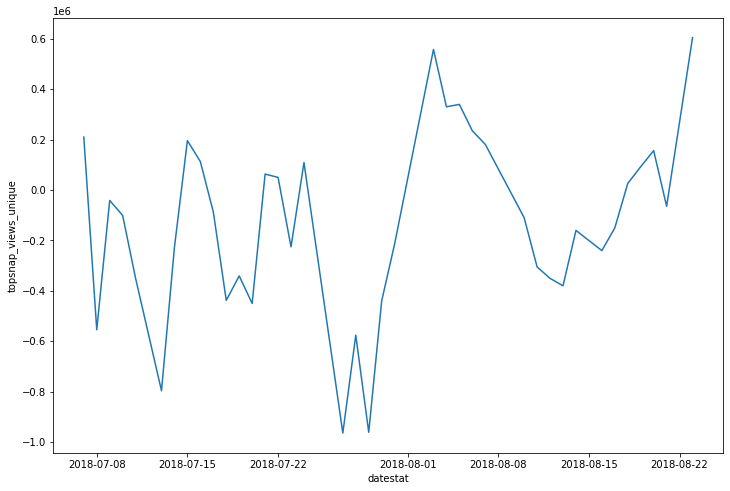

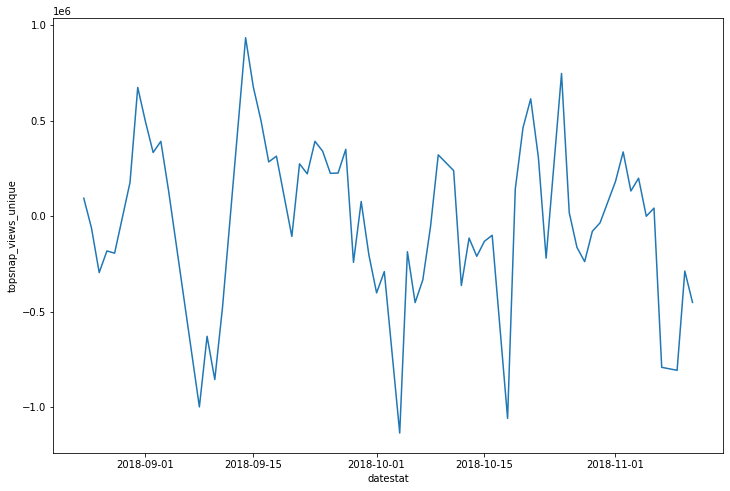

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="topsnap_views_unique", data=behavior_riddle_before)
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="topsnap_views_unique", data=behavior_riddle_after)

In [ ]:
from scipy.stats import ttest_ind
same_dist = []
different_dist = []
for col in behavior_riddle_before.columns.drop('datestat'):
    before = behavior_riddle_before[col].dropna()
    after = behavior_riddle_after[col].dropna()

    stat, p = ttest_ind(before, after)
    print('{}'.format(col))
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
        same_dist.append(col)
    else:
        print('Probably different distributions')
        different_dist.append(col)
    print('')

topsnaps_unique_per_user
stat=-0.071, p=0.943
Probably the same distribution

total_time_viewed_sec
stat=-0.713, p=0.478
Probably the same distribution

time_spent
stat=1.115, p=0.267
Probably the same distribution

topsnap_views
stat=-1.708, p=0.090
Probably the same distribution

topsnap_views_unique
stat=-1.394, p=0.166
Probably the same distribution

screenshots
stat=-1.394, p=0.166
Probably the same distribution

total_time_viewed_sec_7d_avg
stat=-0.586, p=0.559
Probably the same distribution

topsnap_views_unique_7d_avg
stat=-0.898, p=0.371
Probably the same distribution

shares
stat=4.458, p=0.000
Probably different distributions



In [ ]:
different_dist

['shares']

### Audience

In [ ]:
audience.head()

channel_fbid    channel_name    datestat  daily_unique  monthly_unique  \
0  5099640474828800  Riddle Me This  2018-06-27       1588120         1588120   
1  5099640474828800  Riddle Me This  2018-06-28        668541         2189859   
2  5099640474828800  Riddle Me This  2018-06-29        457782         2579107   
3  5099640474828800  Riddle Me This  2018-06-30        291245         2805414   
4  5099640474828800  Riddle Me This  2018-07-01        342089         3076188   

   followers  loyal_users_perc  loyal_users  frq_users_perc  frq_users  \
0     210020               0.0            0            0.00          0   
1     210020               0.0            0            0.00          0   
2     210265               0.0            0            0.01       4441   
3     292191               0.0            0            0.03       8238   
4     347049               0.0          163            0.04      14626   

   return_users_perc  return_users  new_users_perc  new_users  \
0               0.00             0            1.00    1588120   
1               0.10         65995            0.90     602546   
2               0.14         64559            0.85     388782   
3               0.18         52821            0.79     230185   
4               0.15         50216            0.81     277084   

   new_followers_per_day  
0                      0  
1                      0  
2                    245  
3                  81926  
4                  54858

In [ ]:
audience.shape

(369, 15)

In [ ]:
pd.unique(audience['channel_name']) #which channels are in the df

array(['Riddle Me This', 'Beauty Wow', 'Beauty Hacks',
       'Accuse moi si tu peux'], dtype=object)

In [ ]:
print('analysis period form {} to {}'.format(np.min(audience['datestat']), np.max(audience['datestat']))) #analysis period
print('number of analysis days: {}'.format((np.max(audience['datestat'])- np.min(audience['datestat'])).days)) #analysis period


analysis period form 2018-06-27 to 2018-11-11
number of analysis days: 137


In [ ]:
audience_agg_date = audience.groupby('channel_name').datestat.agg(['min', 'max', 'count'])
audience_agg_date['days_obs'] = (audience_agg_date['max'] - audience_agg_date['min']).dt.days
print('number of analysis days per channel:')
print(audience_agg_date)

number of analysis days per channel:
                              min         max  count  days_obs
channel_name                                                  
Accuse moi si tu peux  2018-08-24  2018-11-11     80        79
Beauty Hacks           2018-08-28  2018-11-11     76        75
Beauty Wow             2018-08-28  2018-11-11     75        75
Riddle Me This         2018-06-27  2018-11-11    138       137


In [ ]:
ser_wow_date = np.array(audience[audience['channel_name']=='Beauty Wow'].datestat)
base = datetime.date(2018,8,28)
date_list = [base + datetime.timedelta(days=x) for x in range(ser_wow_date.shape[0])]
theo_dates = np.array(date_list)
print('In Beauty Wow the data from {} are missing'.format(theo_dates[ser_wow_date!=theo_dates][0]))

In Beauty Wow the data from 2018-08-30 are missing


In [ ]:
audience.describe()

channel_fbid  daily_unique  monthly_unique     followers  \
count  3.690000e+02  3.690000e+02    3.690000e+02  3.690000e+02   
mean   5.123914e+15  5.262618e+05    6.964770e+06  9.034128e+05   
std    2.757571e+13  6.107376e+05    3.262816e+06  6.554552e+05   
min    5.099640e+15  0.000000e+00    0.000000e+00  0.000000e+00   
25%    5.099640e+15  1.840970e+05    4.897401e+06  3.693050e+05   
50%    5.109890e+15  3.113090e+05    6.205746e+06  6.637570e+05   
75%    5.132077e+15  6.389070e+05    8.607350e+06  1.501428e+06   
max    5.171178e+15  4.303912e+06    1.577900e+07  2.045300e+06   

       loyal_users_perc   loyal_users  frq_users_perc      frq_users  \
count        369.000000    369.000000      369.000000     369.000000   
mean           0.019648   6010.498645        0.118266   49400.601626   
std            0.016489   4729.937181        0.054091   53854.253260   
min            0.000000      0.000000        0.000000       0.000000   
25%            0.010000   2288.000000        0.080000   22146.000000   
50%            0.020000   5201.000000        0.120000   36388.000000   
75%            0.030000   7642.000000        0.160000   58741.000000   
max            0.070000  27222.000000        0.280000  557032.000000   

       return_users_perc  return_users  new_users_perc     new_users  \
count         369.000000  3.690000e+02      369.000000  3.690000e+02   
mean            0.245637  1.277141e+05        0.602791  3.431366e+05   
std             0.068934  1.699722e+05        0.132302  4.264066e+05   
min             0.000000  0.000000e+00        0.000000  0.000000e+00   
25%             0.220000  4.506200e+04        0.530000  1.040250e+05   
50%             0.250000  7.421200e+04        0.600000  1.905080e+05   
75%             0.280000  1.497300e+05        0.680000  4.047480e+05   
max             0.490000  1.486638e+06        1.000000  3.227073e+06   

       new_followers_per_day  
count             369.000000  
mean            12418.265583  
std             18635.975215  
min              -470.000000  
25%              2096.000000  
50%              5387.000000  
75%             15183.000000  
max            122710.000000

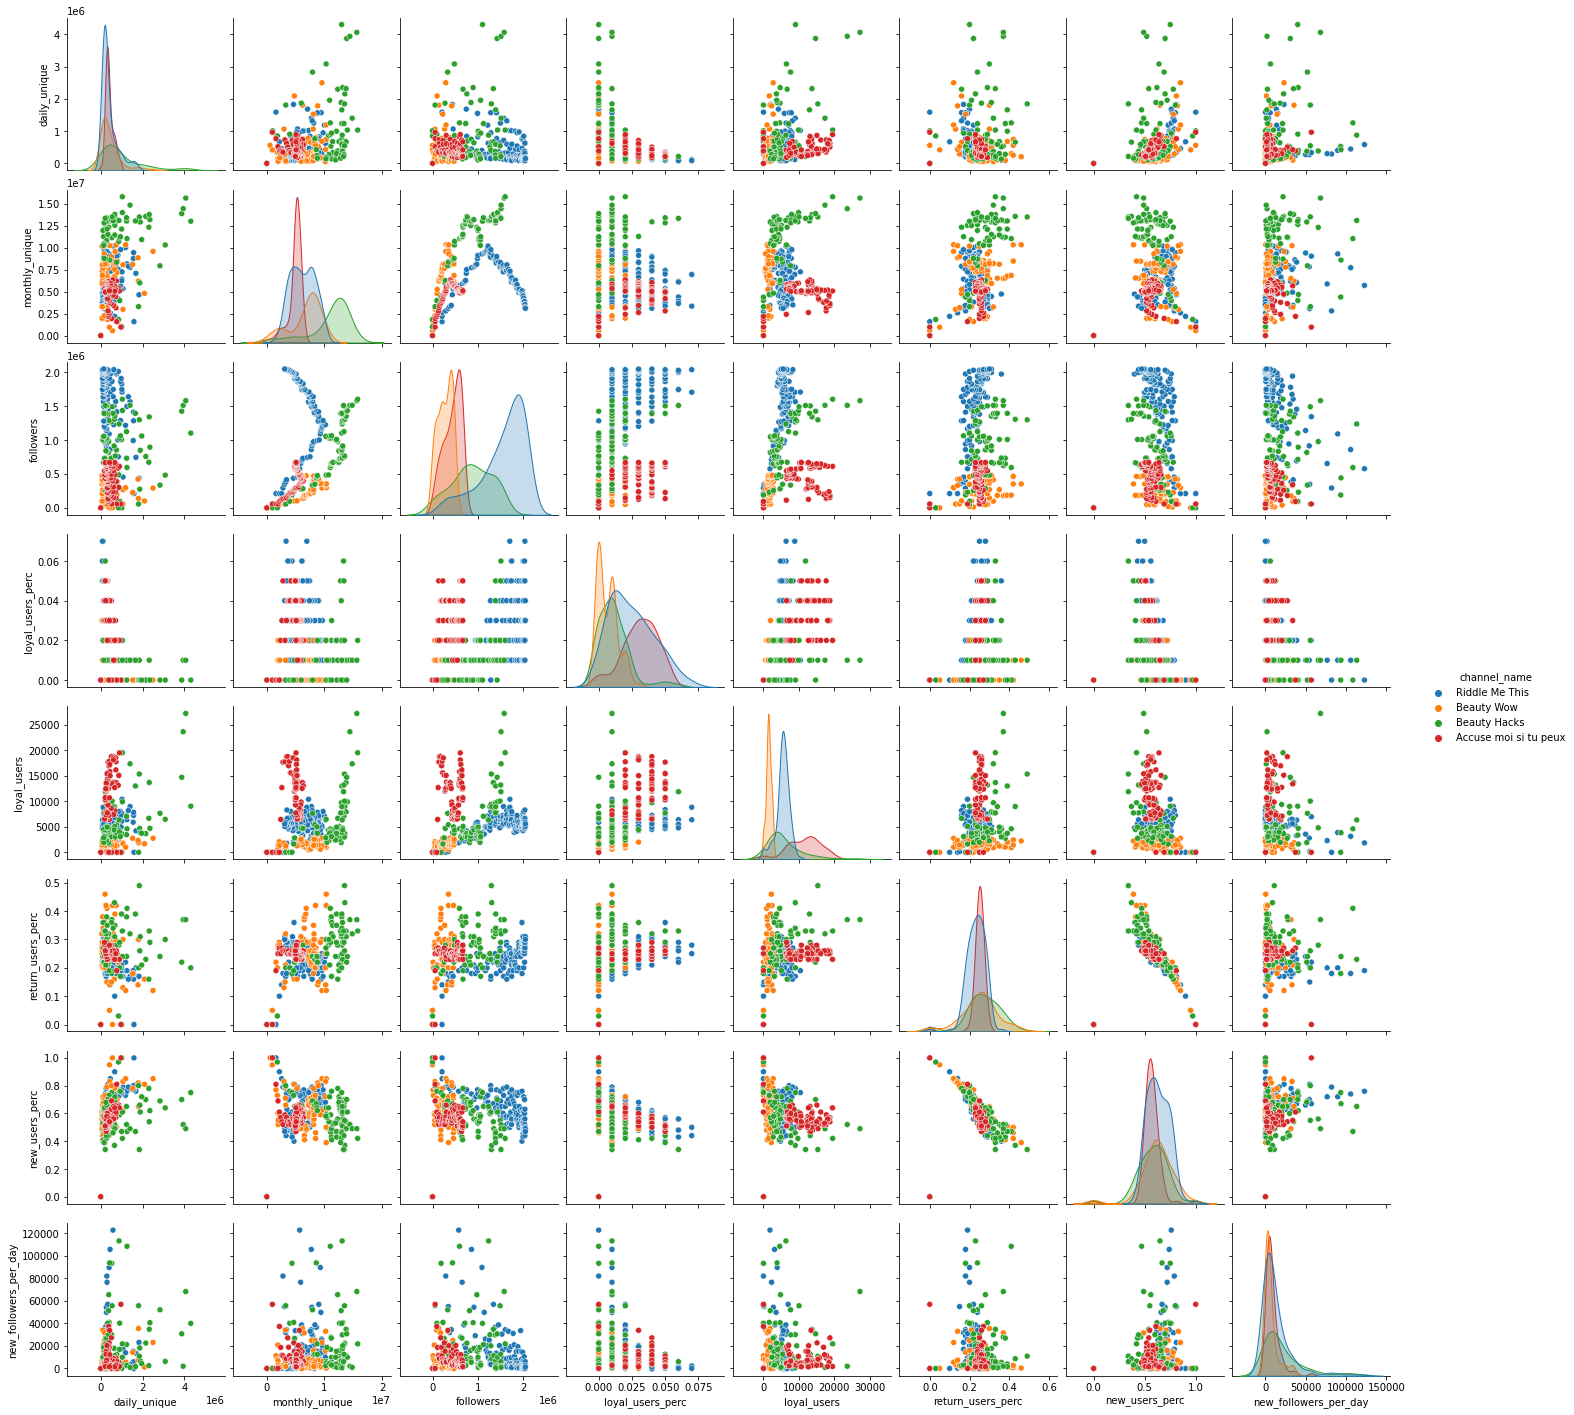

In [ ]:
pairplot = sns.pairplot(audience.drop(['channel_fbid','datestat','return_users','new_users','frq_users_perc', 'frq_users'],axis=1),hue='channel_name')
fig = pairplot.fig
fig.savefig("out2.png") 

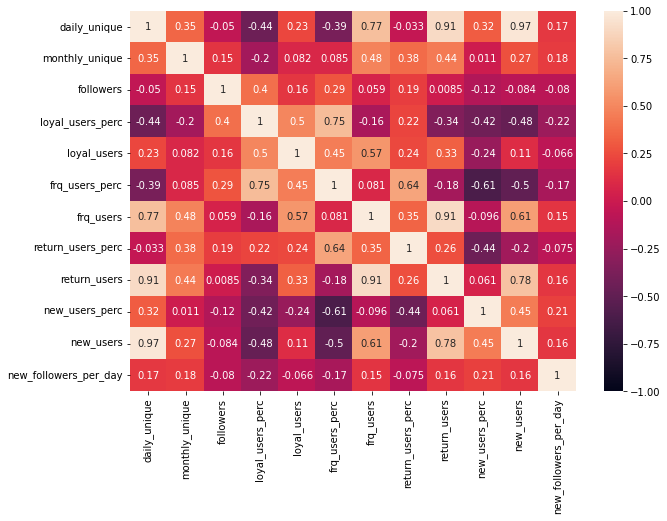

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(audience.drop(['channel_fbid','datestat','channel_name'],axis=1).corr(),vmin=-1, vmax=1, annot=True)

### Visualize

In [ ]:
audience['week'] = pd.to_datetime(audience['datestat']).dt.week
audience_riddle_accuse = audience[audience['channel_name'].isin(['Riddle Me This', 'Accuse moi si tu peux'])]
audience_riddle_accuse['daily_unique_7d_avg'] = audience_riddle_accuse.daily_unique.rolling(7).mean().shift(-3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


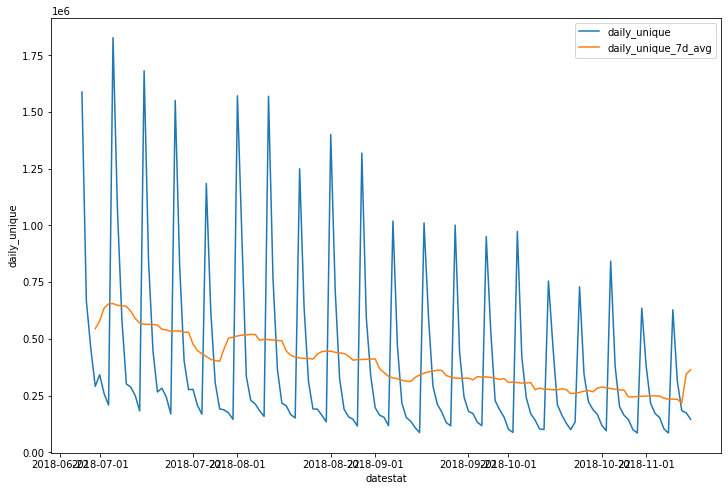

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x="datestat",y="daily_unique"
             ,  data=audience_riddle_accuse[audience_riddle_accuse['channel_name']=='Riddle Me This'], label =  'daily_unique'
             )

graph = sns.lineplot(x="datestat",y="daily_unique_7d_avg"
              , data=audience_riddle_accuse[audience_riddle_accuse['channel_name']=='Riddle Me This'], label='daily_unique_7d_avg',
             )
locator = mdates.DayLocator(interval = 5)
graph.xaxis.set_major_locator(locator)
graph.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
graph.xaxis.set_label_text('Date')
plt.title('Number of unique users engaging Riddle Me This')
plt.xticks(rotation = 90)

plt.show()

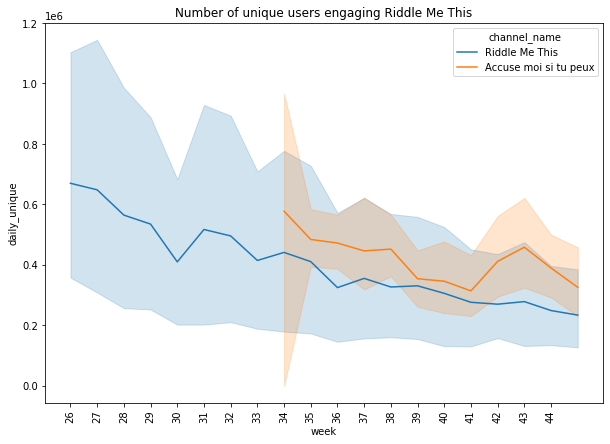

In [ ]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = audience_riddle_accuse, x ='week', y='daily_unique', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Number of unique users engaging Riddle Me This')
plt.xticks(rotation = 90)

plt.show()

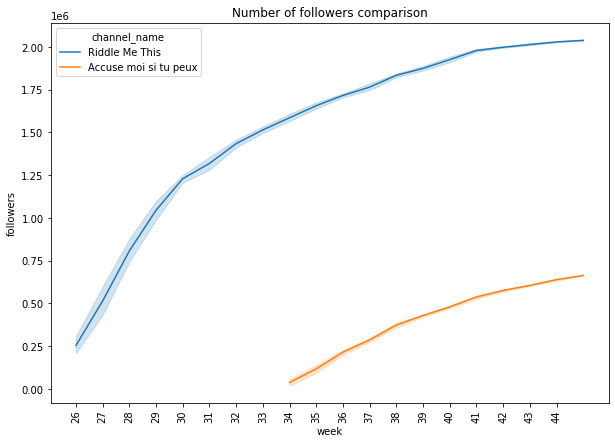

In [194]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = audience_riddle_accuse, x ='week', y='followers', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Number of followers comparison')
plt.xticks(rotation = 90)

plt.show()

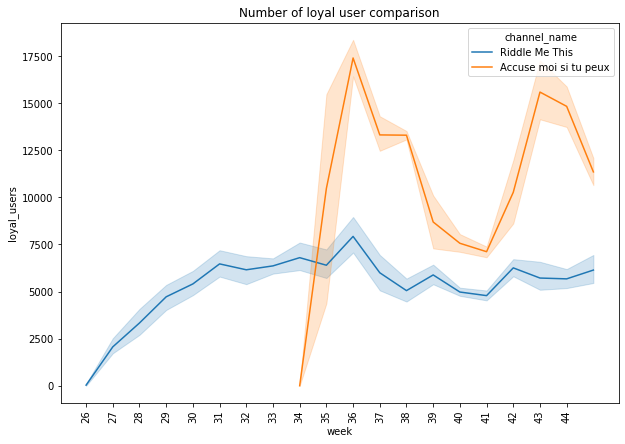

In [195]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = audience_riddle_accuse, x ='week', y='loyal_users', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Number of loyal user comparison')
plt.xticks(rotation = 90)

plt.show()

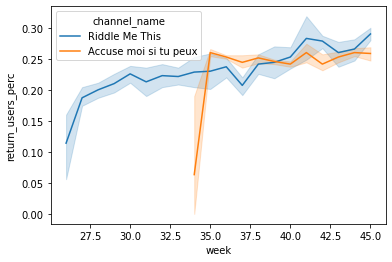

In [ ]:
sns.lineplot(data = audience_riddle_accuse, x ='week', y='return_users_perc', hue='channel_name')

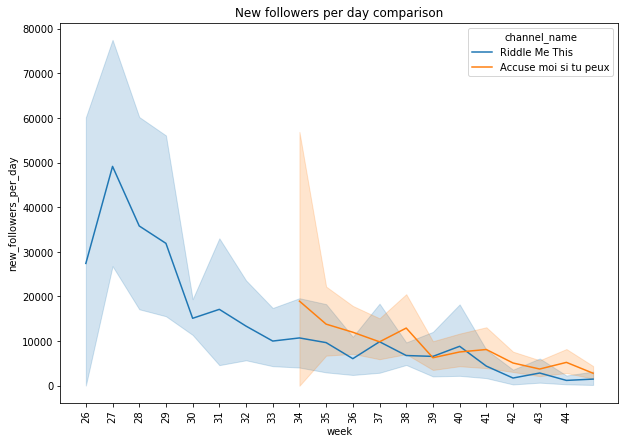

In [192]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = audience_riddle_accuse, x ='week', y='new_followers_per_day', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('New followers per day comparison')
plt.xticks(rotation = 90)

plt.show()


In [ ]:
audience.head()

channel_fbid    channel_name    datestat  daily_unique  monthly_unique  \
0  5099640474828800  Riddle Me This  2018-06-27       1588120         1588120   
1  5099640474828800  Riddle Me This  2018-06-28        668541         2189859   
2  5099640474828800  Riddle Me This  2018-06-29        457782         2579107   
3  5099640474828800  Riddle Me This  2018-06-30        291245         2805414   
4  5099640474828800  Riddle Me This  2018-07-01        342089         3076188   

   followers  loyal_users_perc  loyal_users  frq_users_perc  frq_users  \
0     210020               0.0            0            0.00          0   
1     210020               0.0            0            0.00          0   
2     210265               0.0            0            0.01       4441   
3     292191               0.0            0            0.03       8238   
4     347049               0.0          163            0.04      14626   

   return_users_perc  return_users  new_users_perc  new_users  \
0               0.00             0            1.00    1588120   
1               0.10         65995            0.90     602546   
2               0.14         64559            0.85     388782   
3               0.18         52821            0.79     230185   
4               0.15         50216            0.81     277084   

   new_followers_per_day  week  
0                      0    26  
1                      0    26  
2                    245    26  
3                  81926    26  
4                  54858    26

### Time Series Tests

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


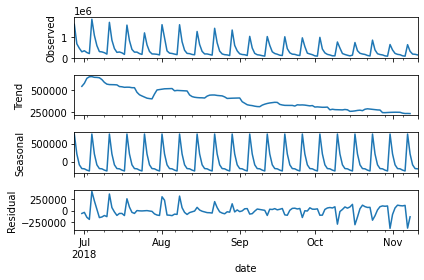

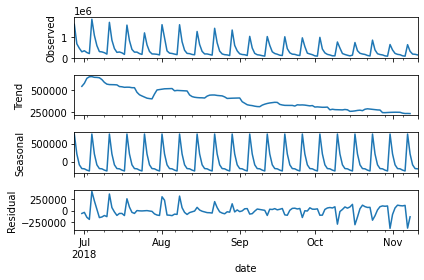

In [ ]:
%matplotlib inline
import statsmodels
from statsmodels.tsa.stattools import adfuller

time_series_train = audience[audience['channel_name'].isin(['Riddle Me This'])]
time_series_train["date"] = pd.to_datetime(time_series_train["datestat"])
time_series_train.date.freq ="D"
time_series_train.set_index("date", inplace=True)
time_series_train.columns


from statsmodels.tsa.seasonal import seasonal_decompose
sd_1 = seasonal_decompose(time_series_train["daily_unique"])

sd_1.plot()


In [ ]:
audience[audience['channel_name'].isin(['Riddle Me This'])].head(1)

channel_fbid    channel_name    datestat  daily_unique  monthly_unique  \
0  5099640474828800  Riddle Me This  2018-06-27       1588120         1588120   

   followers  loyal_users_perc  loyal_users  frq_users_perc  frq_users  \
0     210020               0.0            0             0.0          0   

   return_users_perc  return_users  new_users_perc  new_users  \
0                0.0             0             1.0    1588120   

   new_followers_per_day  week  
0                      0    26

In [ ]:
# test ad-fuller on all time series
import statsmodels
from statsmodels.tsa.stattools import adfuller

temp_var = audience[audience['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','datestat','week'],axis=1).columns
time_series = audience[audience['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','datestat','week'],axis=1)

stable=[]
unite_root = []
print('significance level : 0.05')
for var in temp_var:
    print(f'For {var}')
    tmptime_series = time_series[var].dropna()
    ad_full = adfuller(tmptime_series)
    print(f'Test static {ad_full[1]}',end='\n \n')
    if ad_full[1]<0.05:
        stable.append(var)
    else:
        unite_root.append(var)


significance level : 0.05
For daily_unique
Test static 0.4526531598295792
 
For monthly_unique
Test static 0.5984303765137694
 
For followers
Test static 2.2517778591029114e-05
 
For loyal_users_perc
Test static 0.1987256267096736
 
For loyal_users
Test static 0.03856464200272234
 
For frq_users_perc
Test static 0.5669564651690782
 
For frq_users
Test static 0.22810465136596192
 
For return_users_perc
Test static 0.9151739784068037
 
For return_users
Test static 0.27874734458295924
 
For new_users_perc
Test static 0.7724473135001414
 
For new_users
Test static 0.2503675548808516
 
For new_followers_per_day
Test static 0.38966327595513717
 


In [ ]:
one_diff_ts = time_series[unite_root].diff(7)

temp_var = one_diff_ts.columns
time_series = one_diff_ts

stable2=[]
unite_root2 = []
print('significance level : 0.05')
for var in temp_var:
    print(f'For {var}')
    tmptime_series = time_series[var].dropna()
    ad_full = adfuller(tmptime_series)
    print(f'Test static {ad_full[1]}',end='\n \n')
    if ad_full[1]<0.05:
        stable2.append(var)
    else:
        unite_root2.append(var)


significance level : 0.05
For daily_unique
Test static 3.947846669396358e-05
 
For monthly_unique
Test static 0.005767532197232638
 
For loyal_users_perc
Test static 1.5059201994910462e-07
 
For frq_users_perc
Test static 0.0013105387945942673
 
For frq_users
Test static 5.056775613983509e-06
 
For return_users_perc
Test static 0.0008017533936021281
 
For return_users
Test static 0.008824487570905913
 
For new_users_perc
Test static 0.00025105561348745504
 
For new_users
Test static 4.614946218410138e-09
 
For new_followers_per_day
Test static 1.1241304559006652e-06
 


In [ ]:
stable_riddle_audience = one_diff_ts
for var in stable:
    stable_riddle_audience[var] = audience[audience['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','datestat','week'],axis=1)[var]

stable_riddle_audience['datestat'] = audience[audience['channel_name'].isin(['Riddle Me This'])].drop(['channel_name','channel_fbid','week'],axis=1)['datestat']

In [ ]:
audience_riddle_before = stable_riddle_audience[(stable_riddle_audience['datestat']<datetime.date(2018,8,24))]
audience_riddle_after = stable_riddle_audience[(stable_riddle_audience['datestat']>=datetime.date(2018,8,24))]


In [ ]:
audience_riddle_before=audience_riddle_before.dropna()
audience_riddle_after=audience_riddle_after.dropna()

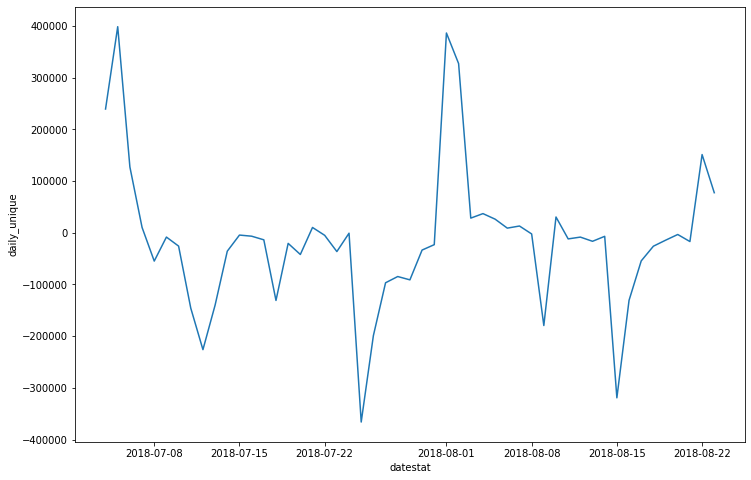

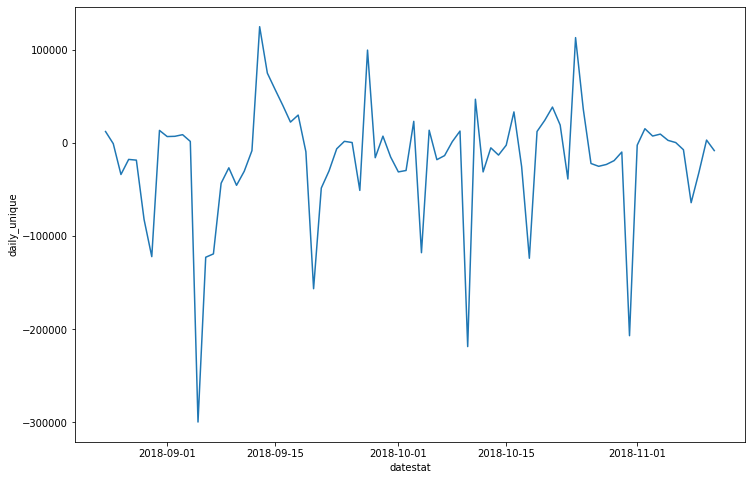

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="daily_unique", data=audience_riddle_before)
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="daily_unique", data=audience_riddle_after)

In [ ]:
for x in audience_riddle_before.columns.drop('datestat'):
    q75,q25 = np.percentile(audience_riddle_before.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    audience_riddle_before.loc[audience_riddle_before[x] < min,x] = np.nan
    audience_riddle_before.loc[audience_riddle_before[x] > max,x] = np.nan

    q75,q25 = np.percentile(audience_riddle_after.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    audience_riddle_after.loc[audience_riddle_after[x] < min,x] = np.nan
    audience_riddle_after.loc[audience_riddle_after[x] > max,x] = np.nan

In [ ]:
audience_riddle_before.isnull().sum()

daily_unique             11
monthly_unique            0
loyal_users_perc          0
frq_users_perc            0
frq_users                 4
return_users_perc         1
return_users              8
new_users_perc            1
new_users                 8
new_followers_per_day     6
followers                 0
loyal_users               0
datestat                  0
dtype: int64

In [ ]:
audience_riddle_after.isnull().sum()

daily_unique             12
monthly_unique            9
loyal_users_perc          5
frq_users_perc            2
frq_users                 4
return_users_perc         2
return_users              6
new_users_perc            2
new_users                14
new_followers_per_day    10
followers                 0
loyal_users               2
datestat                  0
dtype: int64

In [ ]:
# diff_before=diff_before.dropna()
# diff_after=diff_after.dropna()

In [ ]:
summary_before = audience_riddle_before[audience_riddle_before['datestat']>datetime.date(2018,8,24)-datetime.timedelta(40)].describe()
summary_before

daily_unique  monthly_unique  loyal_users_perc  frq_users_perc  \
count      32.000000    3.900000e+01         39.000000       39.000000   
mean   -20082.812500    6.302210e+04          0.003333        0.007692   
std     46251.757462    9.682709e+05          0.007009        0.019529   
min   -130859.000000   -7.868210e+05         -0.010000       -0.030000   
25%    -34125.000000   -6.055160e+05          0.000000       -0.005000   
50%    -12691.500000   -4.796010e+05          0.000000        0.010000   
75%      1676.250000    1.151650e+06          0.010000        0.020000   
max     77546.000000    1.890450e+06          0.020000        0.050000   

         frq_users  return_users_perc  return_users  new_users_perc  \
count    39.000000           39.00000     35.000000       39.000000   
mean    744.717949            0.00359  -2289.514286       -0.014359   
std    3850.657790            0.03065   8305.306565        0.044355   
min   -7410.000000           -0.07000 -25475.000000       -0.110000   
25%   -1463.500000           -0.02000  -8049.000000       -0.040000   
50%     589.000000            0.00000    -80.000000       -0.020000   
75%    3111.500000            0.03000   2263.500000        0.010000   
max    9303.000000            0.05000  11615.000000        0.090000   

           new_users  new_followers_per_day     followers  loyal_users  
count      34.000000              35.000000  3.900000e+01    39.000000  
mean   -28520.882353           -3884.971429  1.334746e+06  5930.205128  
std     55321.773070            6918.943134  1.812428e+05  1184.074037  
min   -187184.000000          -18814.000000  9.574270e+05  3559.000000  
25%    -40644.500000           -7191.000000  1.219866e+06  5137.500000  
50%    -15308.500000           -1444.000000  1.379034e+06  5986.000000  
75%      2928.000000             538.500000  1.490626e+06  6638.500000  
max     81388.000000            9310.000000  1.567597e+06  8968.000000

In [ ]:
summary_after = audience_riddle_after[audience_riddle_after['datestat']<datetime.date(2018,8,24)+datetime.timedelta(40)].describe()
summary_after

daily_unique  monthly_unique  loyal_users_perc  frq_users_perc  \
count     33.000000       31.000000         35.000000       39.000000   
mean   -7917.151515  -408160.903226          0.003429        0.005128   
std    32087.409152   209102.234364          0.007253        0.023381   
min   -82199.000000  -799864.000000         -0.010000       -0.050000   
25%   -30166.000000  -564370.000000          0.000000       -0.010000   
50%    -8339.000000  -430209.000000          0.000000        0.000000   
75%     7221.000000  -268059.500000          0.010000        0.020000   
max    74844.000000    56728.000000          0.020000        0.050000   

          frq_users  return_users_perc  return_users  new_users_perc  \
count     40.000000          40.000000     39.000000       39.000000   
mean    -916.900000           0.005750  -3571.102564       -0.012051   
std     3979.619933           0.031288   9625.440476        0.054829   
min   -10515.000000          -0.060000 -24534.000000       -0.100000   
25%    -2586.250000          -0.020000 -10530.000000       -0.050000   
50%     -261.000000           0.010000  -1314.000000       -0.020000   
75%     1751.750000           0.030000   4605.500000        0.025000   
max     7581.000000           0.060000  11010.000000        0.110000   

          new_users  new_followers_per_day     followers  loyal_users  
count     32.000000              33.000000  4.000000e+01    38.000000  
mean   -8117.687500            -559.393939  1.764928e+06  6022.421053  
std    26125.507591            2915.792623  9.288105e+04  1180.308792  
min   -56068.000000           -6640.000000  1.601880e+06  3917.000000  
25%   -20698.250000           -2536.000000  1.700236e+06  5196.500000  
50%   -10622.000000            -508.000000  1.745062e+06  6020.000000  
75%     7168.250000             899.000000  1.852094e+06  6709.500000  
max    62538.000000            5304.000000  1.905331e+06  8361.000000

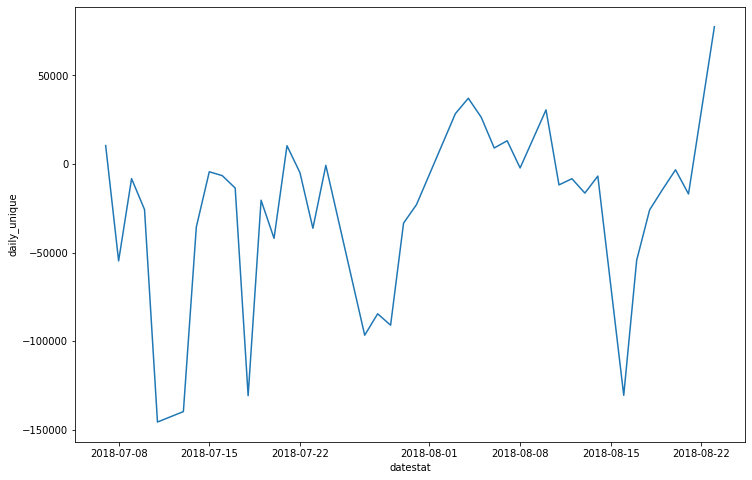

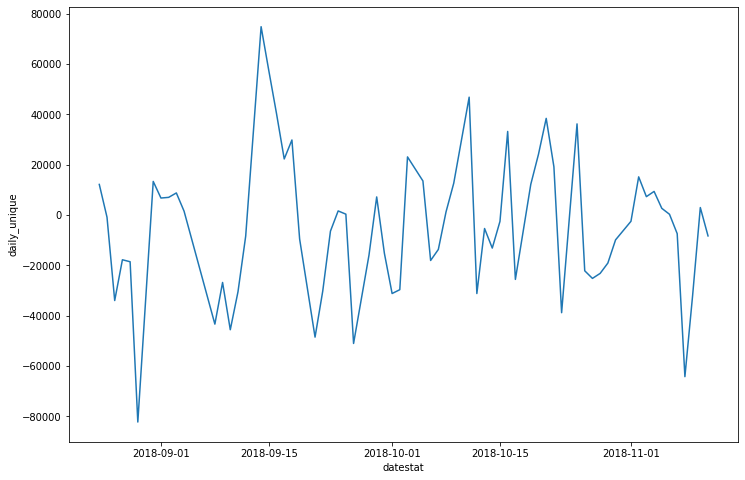

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="daily_unique", data=audience_riddle_before)
plt.figure(figsize=(12,8))
sns.lineplot(x='datestat',y="daily_unique", data=audience_riddle_after)

In [ ]:
from scipy.stats import ttest_ind
same_dist = []
different_dist = []
for col in audience_riddle_before.columns.drop('datestat'):
    before = audience_riddle_before[col].dropna()
    after = audience_riddle_after[col].dropna()

    stat, p = ttest_ind(before, after)
    print('{}'.format(col))
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
        same_dist.append(col)
    else:
        print('Probably different distributions')
        different_dist.append(col)
    print('')

daily_unique
stat=-2.846, p=0.005
Probably different distributions

monthly_unique
stat=6.145, p=0.000
Probably different distributions

loyal_users_perc
stat=1.142, p=0.256
Probably the same distribution

frq_users_perc
stat=1.499, p=0.136
Probably the same distribution

frq_users
stat=1.871, p=0.064
Probably the same distribution

return_users_perc
stat=0.469, p=0.640
Probably the same distribution

return_users
stat=-0.372, p=0.711
Probably the same distribution

new_users_perc
stat=-0.861, p=0.391
Probably the same distribution

new_users
stat=-3.274, p=0.001
Probably different distributions

new_followers_per_day
stat=-4.390, p=0.000
Probably different distributions

followers
stat=-17.094, p=0.000
Probably different distributions

loyal_users
stat=-2.482, p=0.014
Probably different distributions



In [ ]:
same_dist

['loyal_users_perc',
 'frq_users_perc',
 'frq_users',
 'return_users_perc',
 'return_users',
 'new_users_perc']

In [ ]:
different_dist

['daily_unique',
 'monthly_unique',
 'new_users',
 'new_followers_per_day',
 'followers',
 'loyal_users']

### Stories

In [196]:
pd.set_option('display.max_columns', None)

In [197]:
stories.head()

channel_name      channel_fbid                 story country  \
0  Riddle Me This  5099640474828800  RIDDLE ME THIS - E02      AE   
1  Riddle Me This  5099640474828800  RIDDLE ME THIS - E02      AE   
2  Riddle Me This  5099640474828800  RIDDLE ME THIS - E02      AE   
3  Riddle Me This  5099640474828800  RIDDLE ME THIS - E02      AE   
4  Riddle Me This  5099640474828800  RIDDLE ME THIS - E02      AE   

              type  position media_name publication_date expiration_date  \
0  PUBLISHER_STORY         0          0       2018-06-27      2018-07-04   
1             SNAP         1          0       2018-06-27      2018-07-04   
2             SNAP         2          0       2018-06-27      2018-07-04   
3             SNAP         3          0       2018-06-27      2018-07-04   
4             SNAP         4          0       2018-06-27      2018-07-04   

   nb_duration_hrs  topsnap_views  att_views  total_time_viewed_sec  \
0            168.0         583394      47226              2697820.0   
1            168.0          89236      11467               315396.0   
2            168.0          39274          0                99931.6   
3            168.0          41575          0               177835.0   
4            168.0          34343          0                69664.7   

   topsnap_time_viewed_sec  att_time_viewed_sec  avg_time_viewed_per_user_sec  \
0             2.272860e+06             424963.0                       42.4653   
1             1.891941e+05             126202.0                        5.1380   
2             9.993158e+04                  0.0                        3.3233   
3             1.778345e+05                  0.0                        6.3129   
4             6.966467e+04                  0.0                        3.3713   

   avg_time_per_topsnap_view_sec  avg_time_per_att_view_sec  unique_viewers  \
0                         3.8959                     8.9985           63530   
1                         2.1202                    11.0057           61385   
2                         2.5445                     0.0000           30070   
3                         4.2774                     0.0000           28170   
4                         2.0285                     0.0000           20664   

   unique_completers  completion_rate  topsnaps_unique_views  followers_added  \
0              10294           0.0000                 379075              754   
1               7398           0.1205                  61525                0   
2               7314           0.2432                  30591                0   
3              10626           0.3772                  28301                0   
4              10902           0.5276                  21195                0   

   shares_unique  shares  viewers_from_shares  screenshots tags  
0            136     310                  250          192    0  
1             50     197                   70           60    0  
2             22      16                   36            5    0  
3             28      23                   54           16    0  
4              6       0                   10            0    0

In [205]:
stories.shape

(155110, 29)

In [204]:
len(pd.unique(stories.country))

143

In [199]:
stories_presence_days = (pd.to_datetime(stories['expiration_date']) - pd.to_datetime(stories['publication_date'])).dt.days

In [200]:
stories['stories_presence_days'] = stories_presence_days

In [207]:
stories.groupby(['channel_name','stories_presence_days']).agg({'publication_date': ['min','max','count']})

publication_date              \
                                                         min         max   
channel_name          stories_presence_days                                
Accuse moi si tu peux -17845                      2018-11-10  2018-11-10   
                       7                          2018-08-25  2018-11-03   
Beauty Hacks          -17845                      2018-11-10  2018-11-10   
                       2                          2018-08-30  2018-11-08   
                       5                          2018-09-01  2018-11-03   
Beauty Wow            -17846                      2018-11-11  2018-11-11   
                       2                          2018-08-31  2018-11-09   
                       5                          2018-09-02  2018-11-04   
Riddle Me This        -17842                      2018-11-07  2018-11-07   
                       0                          2018-09-12  2018-09-12   
                       7                          2018-06-27  2018-10-31   

                                                    
                                             count  
channel_name          stories_presence_days         
Accuse moi si tu peux -17845                   525  
                       7                     11578  
Beauty Hacks          -17845                  4485  
                       2                     36268  
                       5                     33243  
Beauty Wow            -17846                   612  
                       2                     12410  
                       5                     12779  
Riddle Me This        -17842                  1207  
                       0                      1820  
                       7                     40183

In [208]:
stories['week'] = pd.to_datetime(stories['publication_date']).dt.week
stories_riddle_accuse = stories[stories['channel_name'].isin(['Riddle Me This', 'Accuse moi si tu peux'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [209]:
stories_riddle_accuse.head(2)

channel_name      channel_fbid                 story country  \
0  Riddle Me This  5099640474828800  RIDDLE ME THIS - E02      AE   
1  Riddle Me This  5099640474828800  RIDDLE ME THIS - E02      AE   

              type  position media_name publication_date expiration_date  \
0  PUBLISHER_STORY         0          0       2018-06-27      2018-07-04   
1             SNAP         1          0       2018-06-27      2018-07-04   

   nb_duration_hrs  topsnap_views  att_views  total_time_viewed_sec  \
0            168.0         583394      47226              2697820.0   
1            168.0          89236      11467               315396.0   

   topsnap_time_viewed_sec  att_time_viewed_sec  avg_time_viewed_per_user_sec  \
0              2272860.500             424963.0                       42.4653   
1               189194.125             126202.0                        5.1380   

   avg_time_per_topsnap_view_sec  avg_time_per_att_view_sec  unique_viewers  \
0                         3.8959                     8.9985           63530   
1                         2.1202                    11.0057           61385   

   unique_completers  completion_rate  topsnaps_unique_views  followers_added  \
0              10294           0.0000                 379075              754   
1               7398           0.1205                  61525                0   

   shares_unique  shares  viewers_from_shares  screenshots tags  \
0            136     310                  250          192    0   
1             50     197                   70           60    0   

   stories_presence_days  week  
0                      7    26  
1                      7    26

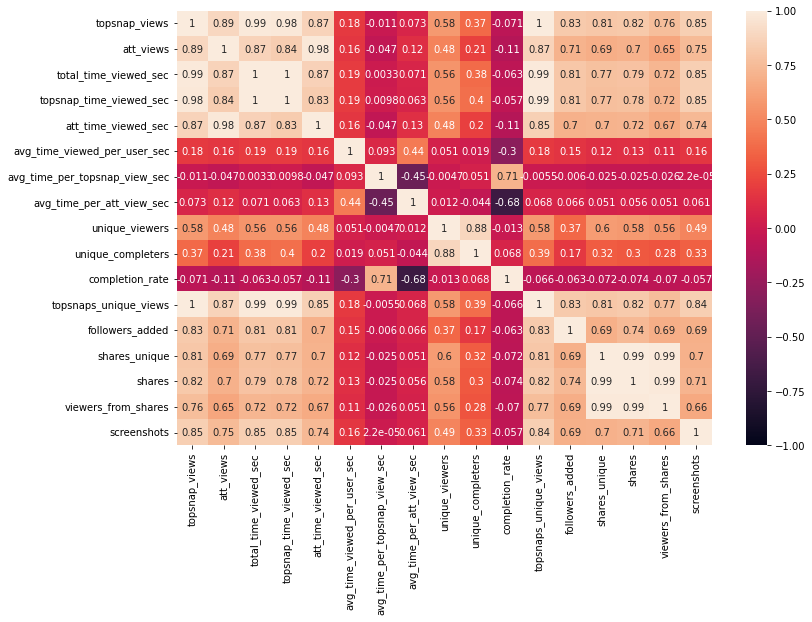

In [218]:
plt.figure(figsize=(12,8))
sns.heatmap(stories_riddle_accuse.drop(['channel_name','channel_fbid','story','country','type','nb_duration_hrs','position','media_name','publication_date','expiration_date','stories_presence_days','week'],axis=1).corr(),vmin=-1, vmax=1, annot=True)

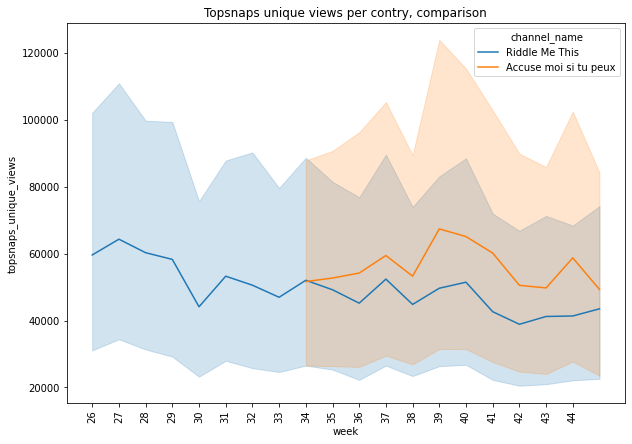

In [221]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = stories_riddle_accuse, x ='week', y='topsnaps_unique_views', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Topsnaps unique views per contry, comparison')
plt.xticks(rotation = 90)

plt.show()


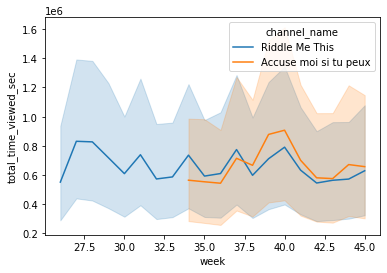

In [ ]:
sns.lineplot(data = stories_riddle_accuse, x ='week', y='total_time_viewed_sec', hue='channel_name')

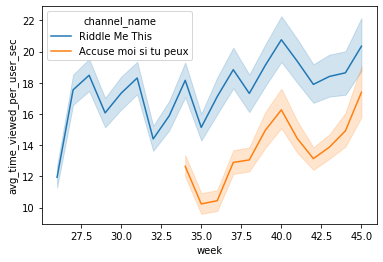

In [ ]:
sns.lineplot(data = stories_riddle_accuse, x ='week', y='avg_time_viewed_per_user_sec', hue='channel_name')

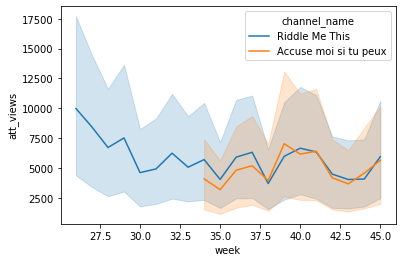

In [ ]:
sns.lineplot(data = stories_riddle_accuse, x ='week', y='att_views', hue='channel_name', )

## Accuse moi impact on Riddle

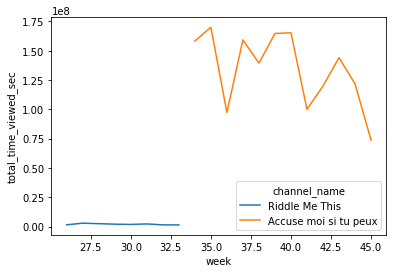

In [ ]:
sns.lineplot(data = stories_riddle_accuse[(stories_riddle_accuse['type']=='PUBLISHER_STORY') & (stories_riddle_accuse['country']=='FR')], x ='week', y='total_time_viewed_sec', hue='channel_name')

francophone countries: Belgium, Benin, Burkina Faso, Burundi, Cameroon, Canada, Chad, the Ivory Coast, the Democratic Republic of the Congo, Djibouti, Equatorial Guinea, France, Haiti, Luxembourg, Madagascar, Mali, Monaco, Niger, Rwanda, Senegal, Seychelles, Switzerland, Togo and Vanuatu

In [222]:
francophone = ['BE','BJ','BF','BI','CM', 'CA','TD','CD','DJ','GQ','FR','HT','LU','MG','ML','MC','NE','RW','SN','SC','CH','TG','VU']
small_francophone = ['BE','CD','FR','LU','SN']
stories_riddle_accuse['is_francophone'] = stories_riddle_accuse['country'].isin(francophone)
stories_riddle_accuse['is_smallfrancophone'] = stories_riddle_accuse['country'].isin(small_francophone)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


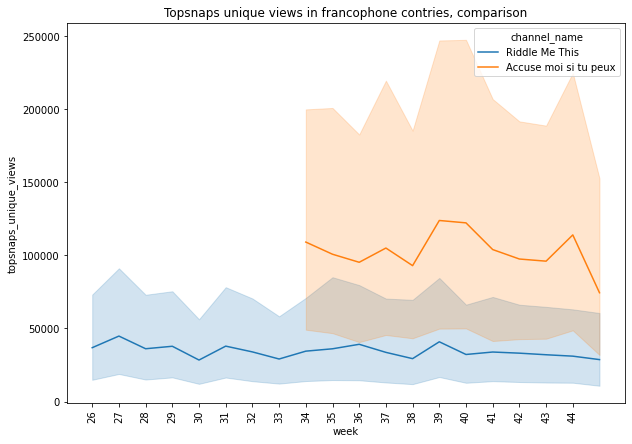

In [227]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = stories_riddle_accuse[(stories_riddle_accuse['country'].isin(francophone))], x ='week', y='topsnaps_unique_views', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Topsnaps unique views in francophone contries, comparison')
plt.xticks(rotation = 90)

plt.show()

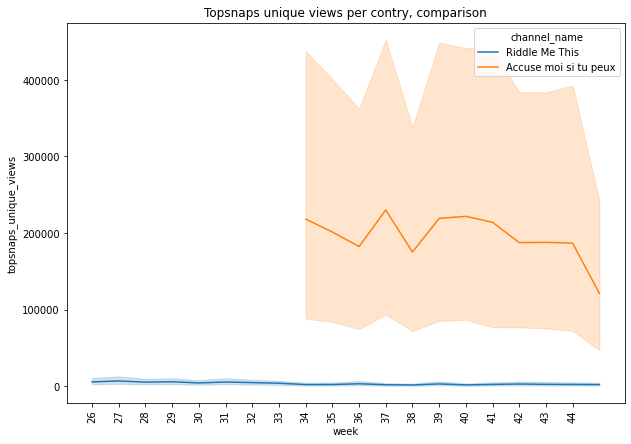

In [225]:

plt.figure(figsize=(10,7))
graph = sns.lineplot(data = stories_riddle_accuse[(stories_riddle_accuse['country'].isin(small_francophone))], x ='week', y='topsnaps_unique_views', hue='channel_name')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Topsnaps unique views per contry, comparison')
plt.xticks(rotation = 90)

plt.show()

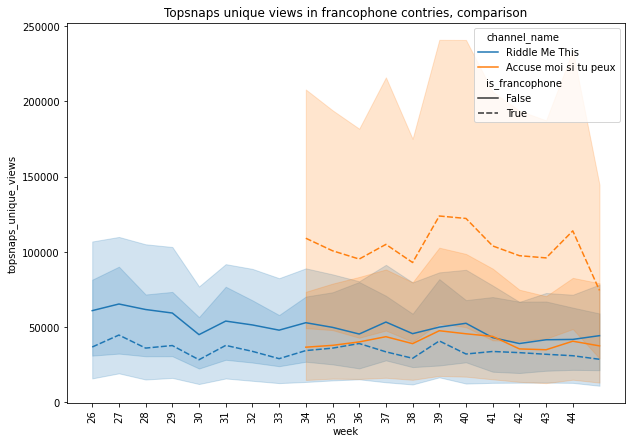

In [229]:

plt.figure(figsize=(10,7))
graph = sns.lineplot(data = stories_riddle_accuse, x ='week', y='topsnaps_unique_views', hue='channel_name', style='is_francophone')
graph.set_xticks(range(np.min(behavior_riddle_accuse['week']), np.max(behavior_riddle_accuse['week'])))

plt.title('Topsnaps unique views in francophone contries, comparison')
plt.xticks(rotation = 90)

plt.show()

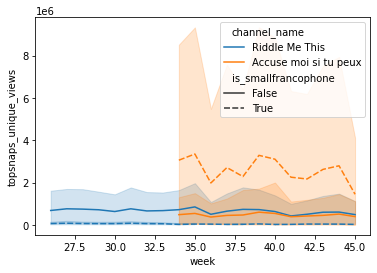

In [ ]:
sns.lineplot(data = stories_riddle_accuse[(stories_riddle_accuse['type']=='PUBLISHER_STORY')], x ='week', y='topsnaps_unique_views', hue='channel_name', style='is_smallfrancophone')

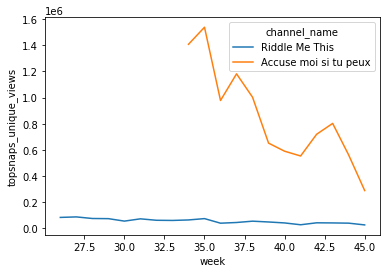

In [ ]:
sns.lineplot(data = stories_riddle_accuse[(stories_riddle_accuse['type']=='PUBLISHER_STORY') & (stories_riddle_accuse['country']=='BE')], x ='week', y='topsnaps_unique_views', hue='channel_name')

In [ ]:
stories_riddle_accuse.columns

Index(['channel_name', 'channel_fbid', 'story', 'country', 'type', 'position',
       'media_name', 'publication_date', 'expiration_date', 'nb_duration_hrs',
       'topsnap_views', 'att_views', 'total_time_viewed_sec',
       'topsnap_time_viewed_sec', 'att_time_viewed_sec',
       'avg_time_viewed_per_user_sec', 'avg_time_per_topsnap_view_sec',
       'avg_time_per_att_view_sec', 'unique_viewers', 'unique_completers',
       'completion_rate', 'topsnaps_unique_views', 'followers_added',
       'shares_unique', 'shares', 'viewers_from_shares', 'screenshots', 'tags',
       'stories_presence_days', 'week', 'is_francophone',
       'is_smallfrancophone'],
      dtype='object')

In [ ]:
stories_riddle_accuse[stories_riddle_accuse['is_francophone']==True].topsnap_views

214       126240
215        15489
216         7135
217         7243
218         6442
           ...  
154999       411
155000       396
155001       735
155002       387
155003        42
Name: topsnap_views, Length: 5187, dtype: int64

In [248]:
from scipy.stats import ttest_ind
franc_before = stories_riddle_accuse[(stories_riddle_accuse['is_francophone']==True) & (stories_riddle_accuse['channel_name']=='Riddle Me This') & (stories_riddle_accuse['publication_date']<datetime.date(2018,8,24))].topsnaps_unique_views.dropna()
franc_after = stories_riddle_accuse[(stories_riddle_accuse['is_francophone']==True) & (stories_riddle_accuse['channel_name']=='Riddle Me This') & (stories_riddle_accuse['publication_date']>=datetime.date(2018,8,24))].topsnaps_unique_views.dropna()

stat, p = ttest_ind(franc_before, franc_after)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.255, p=0.799
Probably the same distribution


In [242]:
from scipy.stats import ttest_ind
franc = stories_riddle_accuse[(stories_riddle_accuse['is_francophone']==True) & (stories_riddle_accuse['channel_name']=='Riddle Me This')].topsnap_views.dropna()
nonfranc = stories_riddle_accuse[(stories_riddle_accuse['is_francophone']==False) & (stories_riddle_accuse['channel_name']=='Riddle Me This')].topsnap_views.dropna()

stat, p = ttest_ind(franc, nonfranc)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.000, p=0.317
Probably the same distribution


In [ ]:
franc = stories_riddle_accuse[(stories_riddle_accuse['is_smallfrancophone']==True) & (stories_riddle_accuse['publication_date']<datetime.date(2018,8,24))].topsnap_views
nonfranc = stories_riddle_accuse[(stories_riddle_accuse['is_smallfrancophone']==False) & (stories_riddle_accuse['publication_date']<datetime.date(2018,8,24))].topsnap_views

stat, p = ttest_ind(franc, nonfranc)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.624, p=0.104
Probably the same distribution


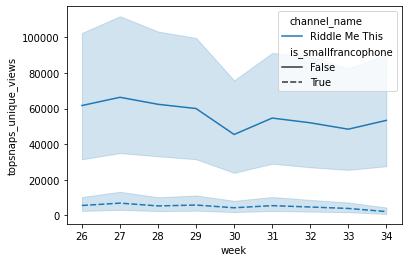

In [ ]:
sns.lineplot(data = stories_riddle_accuse[(stories_riddle_accuse['publication_date']<datetime.date(2018,8,24))], x ='week', y='topsnaps_unique_views', hue='channel_name', style='is_smallfrancophone')

### check beauty usage from spanish speaking

Argentina, Bolivia, Chile, Colombia, Costa Rica, Cuba, Dominican Republic, Ecuador, El Salvador, Guatemala, Honduras, Mexico, Nicaragua, Panama, Paraguay, Peru, Uruguay, and Venezuela) as well as of the Commonwealth of Puerto Rico, along with Spain in Europe and Equatorial Guinea

In [249]:
spanish = ['AR','BO','CL','CO','CR','CU','DO','EC','SV','GT','HN','MX','NI','PA','PY','PE','ES','UY','VE','PR']
stories_beauty = stories[stories['channel_name'].isin(['Beauty Wow','Beauty Hacks'])]
stories_beauty['is_spanish'] = stories_beauty['country'].isin(spanish)
stories_beauty['is_francophone'] = stories_beauty['country'].isin(francophone)
stories_beauty['is_indian'] = stories_beauty['country'].isin(['IN'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

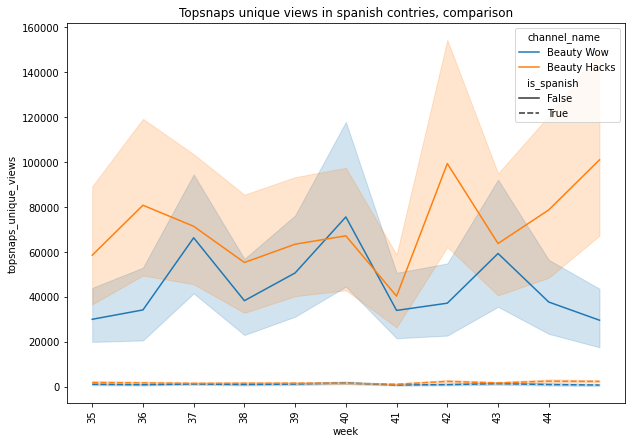

In [253]:

plt.figure(figsize=(10,7))
graph = sns.lineplot(data = stories_beauty, x ='week', y='topsnaps_unique_views', hue='channel_name', style='is_spanish')
graph.set_xticks(range(np.min(stories_beauty['week']), np.max(stories_beauty['week'])))

plt.title('Topsnaps unique views in spanish contries, comparison')
plt.xticks(rotation = 90)

plt.show()

In [254]:
from scipy.stats import ttest_ind
span = stories_beauty[(stories_beauty['is_spanish']==True) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnaps_unique_views
nonspan = stories_beauty[(stories_beauty['is_spanish']==False) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnaps_unique_views

stat, p = ttest_ind(span, nonspan, alternative= 'less')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-4.982, p=0.000
Probably different distributions


In [255]:
from scipy.stats import ttest_ind
span = stories_beauty[(stories_beauty['is_spanish']==True) & (stories_beauty['channel_name']=='Beauty Wow')].topsnaps_unique_views
nonspan = stories_beauty[(stories_beauty['is_spanish']==False) & (stories_beauty['channel_name']=='Beauty Wow')].topsnaps_unique_views

stat, p = ttest_ind(span, nonspan, alternative= 'less')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-3.274, p=0.001
Probably different distributions


### French

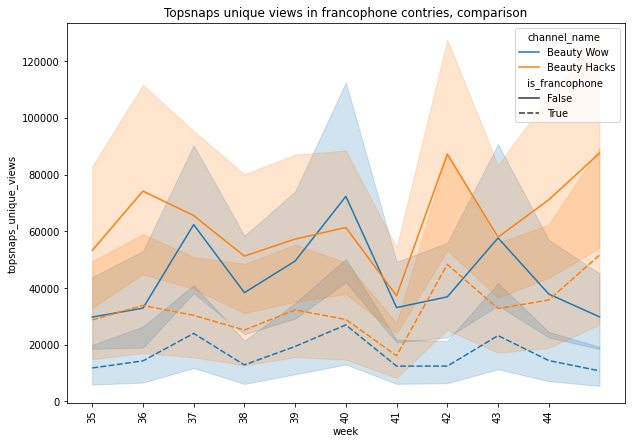

In [256]:
plt.figure(figsize=(10,7))
graph = sns.lineplot(data = stories_beauty, x ='week', y='topsnaps_unique_views', hue='channel_name', style='is_francophone')
graph.set_xticks(range(np.min(stories_beauty['week']), np.max(stories_beauty['week'])))

plt.title('Topsnaps unique views in francophone contries, comparison')
plt.xticks(rotation = 90)

plt.show()

In [257]:
from scipy.stats import ttest_ind
franc = stories_beauty[(stories_beauty['is_francophone']==True) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnaps_unique_views
nonfranc = stories_beauty[(stories_beauty['is_francophone']==False) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnaps_unique_views

stat, p = ttest_ind(franc, nonfranc, alternative= 'less')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.584, p=0.057
Probably the same distribution


In [258]:
from scipy.stats import ttest_ind
franc = stories_beauty[(stories_beauty['is_francophone']==True) & (stories_beauty['channel_name']=='Beauty Wow')].topsnaps_unique_views
nonfrancn = stories_beauty[(stories_beauty['is_francophone']==False) & (stories_beauty['channel_name']=='Beauty Wow')].topsnaps_unique_views

stat, p = ttest_ind(franc, nonfranc, alternative= 'less')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.600, p=0.055
Probably the same distribution


### Indian

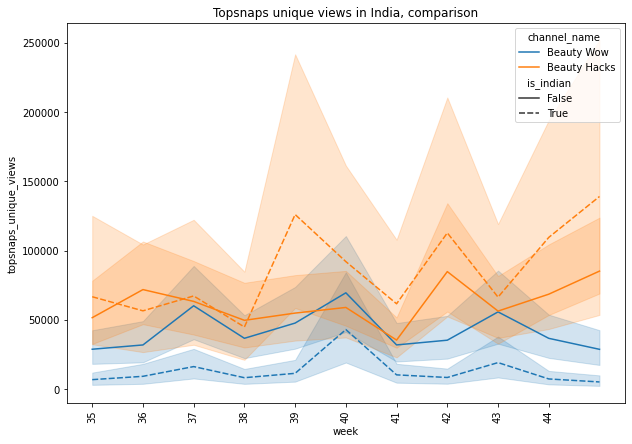

In [259]:

plt.figure(figsize=(10,7))
graph = sns.lineplot(data = stories_beauty, x ='week', y='topsnaps_unique_views', hue='channel_name', style='is_indian')
graph.set_xticks(range(np.min(stories_beauty['week']), np.max(stories_beauty['week'])))

plt.title('Topsnaps unique views in India, comparison')
plt.xticks(rotation = 90)

plt.show()

In [260]:
from scipy.stats import ttest_ind
is_indian = stories_beauty[(stories_beauty['is_indian']==True) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnaps_unique_views
nonis_indian = stories_beauty[(stories_beauty['is_indian']==False) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnaps_unique_views

stat, p = ttest_ind(is_indian, nonis_indian, alternative= 'less')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.501, p=0.692
Probably the same distribution


In [262]:
from scipy.stats import ttest_ind
is_indian = stories_beauty[(stories_beauty['is_indian']==True) & (stories_beauty['channel_name']=='Beauty Wow')].topsnaps_unique_views
nonis_indian = stories_beauty[(stories_beauty['is_indian']==False) & (stories_beauty['channel_name']=='Beauty Wow')].topsnaps_unique_views

stat, p = ttest_ind(is_indian, nonis_indian, alternative= 'less')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-1.112, p=0.133
Probably the same distribution


## Test usage each country

In [ ]:
stories_beauty.head()

channel_name      channel_fbid            story country  \
43210   Beauty Wow  5109890280062976  Albert Einstein      AE   
43211   Beauty Wow  5109890280062976  Albert Einstein      AE   
43212   Beauty Wow  5109890280062976  Albert Einstein      AE   
43213   Beauty Wow  5109890280062976  Albert Einstein      AE   
43214   Beauty Wow  5109890280062976  Albert Einstein      AE   

                  type  position media_name publication_date expiration_date  \
43210  PUBLISHER_STORY         0          0       2018-09-21      2018-09-23   
43211             SNAP         1          0       2018-09-21      2018-09-23   
43212             SNAP         2          0       2018-09-21      2018-09-23   
43213             SNAP         3          0       2018-09-21      2018-09-23   
43214             SNAP         4          0       2018-09-21      2018-09-23   

       nb_duration_hrs  topsnap_views  att_views  total_time_viewed_sec  \
43210             48.0         130917          0               470070.0   
43211             48.0          20515          0                60642.4   
43212             48.0          11165          0                35539.7   
43213             48.0           8653          0                29524.3   
43214             48.0           7904          0                24053.5   

       topsnap_time_viewed_sec  att_time_viewed_sec  \
43210              469993.7188                  0.0   
43211               60642.3828                  0.0   
43212               35539.6563                  0.0   
43213               29524.3496                  0.0   
43214               24053.5430                  0.0   

       avg_time_viewed_per_user_sec  avg_time_per_topsnap_view_sec  \
43210                       26.9845                         3.5900   
43211                        3.5786                         2.9560   
43212                        3.7168                         3.1831   
43213                        3.8086                         3.4120   
43214                        3.4560                         3.0432   

       avg_time_per_att_view_sec  unique_viewers  unique_completers  \
43210                        0.0           17420               4020   
43211                        0.0           16946               3248   
43212                        0.0            9562               1426   
43213                        0.0            7752               1676   
43214                        0.0            6960               1714   

       completion_rate  topsnaps_unique_views  followers_added  shares_unique  \
43210           0.0000                 119578              158             16   
43211           0.1917                  17028                0              6   
43212           0.1491                   9788                0              0   
43213           0.2162                   7862                0              0   
43214           0.2463                   7066                0              0   

       shares  viewers_from_shares  screenshots  \
43210      21                   18           18   
43211       0                    8            0   
43212       0                    0            0   
43213       0                    0            0   
43214       0                    0            0   

                                                    tags  \
43210  Cosmetics | Beauty | Tattoos & Body Art | Beau...   
43211  Beauty | Cosmetics | Tattoos & Body Art | Make...   
43212                                                  0   
43213                                                  0   
43214                                                  0   

       stories_presence_days  week  is_spanish  is_francophone  is_indian  
43210                      2    38       False           False      False  
43211                      2    38       False           False      False  
43212                      2    38       False           False      False  
43213                      2    38       Fals

In [263]:
res_country_wow=[]
for country in pd.unique(stories_beauty.country):
    is_country = stories_beauty[(stories_beauty['country']==country) & (stories_beauty['channel_name']=='Beauty Wow')].topsnap_views
    non_country = stories_beauty[(stories_beauty['country']!=country) & (stories_beauty['channel_name']=='Beauty Wow')].topsnap_views

    stat, p = ttest_ind(is_country, non_country, alternative= 'less')
    # print('{}'.format(country))
    # print('stat=%.3f, p=%.3f' % (stat, p))
    # if p > 0.05:
    #     print('Probably the same distribution')
    # else:
    #     print('Probably different distributions')
    # print('')
    res_country_wow.append([country,p])

In [ ]:
pd.DataFrame(res_country_wow, columns=['country','p-value']).dropna().sort_values('p-value').head(5)

country   p-value
1       AL  0.061284
39      NG  0.061438
37      MX  0.062293
15      FI  0.063575
46      PR  0.063825

In [265]:
res_country_hacks=[]
for country in pd.unique(stories_beauty.country):
    is_country = stories_beauty[(stories_beauty['country']==country) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnap_views
    non_country = stories_beauty[(stories_beauty['country']!=country) & (stories_beauty['channel_name']=='Beauty Hacks')].topsnap_views

    stat, p = ttest_ind(is_country, non_country, alternative= 'less')
    # print('{}'.format(country))
    # print('stat=%.3f, p=%.3f' % (stat, p))
    # if p > 0.05:
    #     print('Probably the same distribution')
    # else:
    #     print('Probably different distributions')
    # print('')
    res_country_hacks.append([country,p])

In [267]:
pd.DataFrame(res_country_hacks, columns=['country','p-value']).dropna().sort_values('p-value').head(10)

country   p-value
71      MV  0.088965
12      DZ  0.089323
36      MK  0.091044
61      DO  0.091057
6       BG  0.091143
63      GR  0.091233
65      HU  0.092251
30      JP  0.092269
20      HK  0.092505
67      LT  0.092633